## Загрузка и изучение данных

Импортируем все необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import phik

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import accuracy_score

from scipy import stats

Загружаем файлы датасетов, создаем датафреймы, выводим первые 15 строк и основную информацию о них для ознакомления

In [3]:
#открываем файлы датасетов и создаем датафреймы
try:
    data_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    data_cow_name = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    data_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    data_ferma = pd.read_csv('https://.../datasets/ferma_main.csv', sep=';') #часть ссылки скрыта ввиду NDA
    data_cow_name = pd.read_csv('https://.../datasets/ferma_dad.csv', sep=';') #часть ссылки скрыта ввиду NDA
    data_cow_buy = pd.read_csv('https://.../datasets/cow_buy.csv', sep=';') #часть ссылки скрыта ввиду NDA

#выводим первые 15 строк и основную информацию для каждого датафрейма
for d in [data_ferma,data_cow_name,data_cow_buy]:
    display(d.head(15))
    d.info()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Созданные датафреймы:
- имеют следующие размерности:
    - data_ferma - 634 строки;
    - data_cow_name - 629 строк;
    - data_cow_buy - 20 строк.
- не имеют явных пропусков
- названия столбцов не приведены к змеиному "регистру" (имеют разные регистры и пробелы в названии и длиннные названия)
- некоторые столбцы имеют неккоректный тип данных из-за некорректных разделителей значений
- в столбцах присутствуют неявные дубликаты

##  Предобработка данных

### Переименование столбцов

Сократим слишком длинные названия столбцов, удалив расшифровки, чтобы можно было удобней использовать их наименования в дальнейшем и отрисовывать их на графиках

In [4]:
data_ferma = data_ferma.rename(columns = \
                               {'ЭКЕ (Энергетическая кормовая единица)':'эке','СПО (Сахаро-протеиновое соотношение)':'спо'})

Теперь удалим пробелы в названиях столбцов датафреймов, приведем названия к нижнему регистру, удалим размерности столбцов для сокращения их наименований.

In [5]:
for d in [data_ferma,data_cow_name,data_cow_buy]:
    d.columns = d.columns.str.lower()
    d.columns = d.columns.str.split(',').str[0]
    d.columns = d.columns.str.replace(' ','_')
    print(d.columns)

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')
Index(['id', 'имя_папы'], dtype='object')
Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белок', 'возраст'],
      dtype='object')


**Столбцы приведены к "змеиному" регистру и убраны длинные наименования**

### Удаление пропусков

Посчитаем все пропуски во всех датафреймах, подтвердив результаты первичного ознакомления

In [6]:
for d in [data_ferma,data_cow_name,data_cow_buy]:
    print(d.isna().sum())

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64
id          0
имя_папы    0
dtype: int64
порода                   0
тип_пастбища             0
порода_папы_быка         0
имя_папы                 0
текущая_жирность         0
текущий_уровень_белок    0
возраст                  0
dtype: int64


**Во всех датафреймах отсутствуют явные пропуски**

### Аномальные значения

Выведем описательные статистики для всех столбцов

In [7]:
for d in [data_ferma,data_cow_name,data_cow_buy]:
    print(d.describe().T)

               count         mean          std     min      25%     50%  \
id             634.0   317.460568   183.096982     1.0   159.25   317.5   
удой           634.0  6187.025237  1638.401021  5204.0  5751.75  6130.5   
сырой_протеин  634.0  1922.682965   182.392548  1660.0  1772.25  1880.5   

                   75%      max  
id              475.75    629.0  
удой           6501.00  45616.0  
сырой_протеин  2058.75   2349.0  
    count   mean        std  min    25%    50%    75%    max
id  629.0  315.0  181.72094  1.0  158.0  315.0  472.0  629.0
                      count unique              top freq
порода                   20      2  РефлешнСоверинг   11
тип_пастбища             20      2        равнинное   11
порода_папы_быка         20      2          Соверин   12
имя_папы                 20      4           Буйный    8
текущая_жирность         20     12              3,4    3
текущий_уровень_белок    20     12            3,074    5
возраст                  20      2      бо

Значений численных столбцов пока маловато, пока мы не привели в порядок типы данных столбцов, но уже видно, что максимальное кол-во удоя в 45 тонн выглядит неправдоподобным Выведем несколько строк таблицы `data_ferma` с самымы большими кол-вами удоя

In [8]:
data_ferma.sort_values(by='удой', ascending = False).head(5)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
16,17,45616,"11,5",1675,"0,93",Вис Бик Айдиал,Холмистое,Айдиалл,"3,22","3,076",вкусно,более_2_лет
70,71,7222,"16,8",2157,"0,95",Вис Бик Айдиал,Холмистое,Айдиалл,"3,7","3,076",вкусно,более_2_лет
135,136,7207,"16,6",2343,"0,94",Вис Бик Айдиал,Холмистое,Айдиал,"3,72","3,078",вкусно,более_2_лет
296,297,7201,"15,8",2077,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,072",вкусно,более_2_лет
294,295,7197,"15,6",2241,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,075",вкусно,более_2_лет


Введено некорректное значение, так как значение всего 1, то его легче удалить, чем менять на средние значения удоя для коровы с похожими характеристиками и исказить результат.

проверяем кол-во строк до удаления

In [9]:
data_ferma.shape[0]

634

Удаляем строку с аномальным значением и обновляем индексацию

In [10]:
data_ferma = data_ferma.query('удой < 45616').reset_index(drop = True)

Проверяем кол-во строк после удаления

In [11]:
data_ferma.shape[0]

633

В датафреймах `data_ferma` и `data_cow_buy` в численных значениях неверные разделители, вместо `.` стоят `,`, из-за чего тип данных столбцов определился не `float`, а `object`. Поменяем разделители на корректные в этих двух датафреймах и выведем первые 5 строк в каждом для проверки замены

In [12]:
for c in ['эке','спо','жирность','белок']:
    data_ferma[c] = data_ferma[c].str.replace(',','.')
data_ferma.head(5)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.4,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [13]:
for c in ['текущая_жирность','текущий_уровень_белок']:
    data_cow_buy[c] = data_cow_buy[c].str.replace(',','.')
data_cow_buy.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.4,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Следующих шагом проверяем более детально столбцы с численными значениями, пока имеющими неверный тип данных

In [14]:
for c in ['эке','спо','жирность','белок']:
    print(data_ferma[c].unique())
for c in ['текущая_жирность','текущий_уровень_белок']:
    print(data_cow_buy[c].unique())

['14.2' '12.8' '14' '12.4' '12.7' '13.2' '14.7' '13.4' '13.7' '16.5'
 '15.4' '14.5' '16' '15.6' '15.7' '14.3' '15.5' '14.6' '15.9' '15.2'
 '14.8' '16.4' '11.8' '14.4' '16.1' '12.9' '13.8' '13.3' '16.3' '13.9'
 '14.1' '16.7' '15.8' '16.2' '12.2' '14.9' '13.6' '12.5' '16.8' '13.5'
 '15.1' '12.1' '16.6' '15.3' '13.1' '12.3' '11.9' '12.6' '15' '13' '12'
 '11.1' '11.7' '10.9']
['0.89' '0.885' '0.93' '0.94' '0.895' '0.95' '0.96' '0.85' '0.84' '0.86'
 '0.88' '0.9']
['3.58' '3.54' '3.59' '3.4' '3.73' '3.13' '3.48' '3.55' '3.71' '3.72'
 '3.61' '3.03' '3.49' '3.31' '3.7' '3.74' '3.21' '3.11' '3.25' '3.34'
 '3.24' '3.53' '3.16' '3.26' '3.57' '3.44' '3.38' '3.18' '3.42' '3.62'
 '3.75' '3.41' '3.27' '3.63' '3.12' '3.64' '3.69' '3.22' '3.37' '3.65'
 '3.33' '3.28' '3.35' '3.32' '3.23' '3.15' '3.01' '2.99' '3.39' '3.19']
['3.076' '3.079' '3.074' '3.075' '3.073' '3.078' '3.077' '3.071' '3.08'
 '3.072' '3.081' '3.082' '3.07' '3.069' '3.085']
['3.58' '3.54' '3.59' '3.4' '3.64' '3.63' '3.57' '3.73' '3.68'

Аномальных значений не обнаружено

В столбцах с породой одни значения с пробелами, другие без, проверим на корректность значения

In [15]:
for d in data_ferma,data_cow_buy:
    print(d['порода'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Вис Бик Айдиал' 'РефлешнСоверинг']


Добавим пробелы в породе `Рефлекшн Соверинг` для корректного отображения значений в столбцах и проверим замену

In [16]:
for d in data_ferma, data_cow_buy:
    d['порода'] = d['порода'].replace('РефлешнСоверинг','Рефлешн Соверинг')
    print(d['порода'].unique())

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['Вис Бик Айдиал' 'Рефлешн Соверинг']


Для однотипной записи значений во всех столбцах датафреймов, заменим нижние подчеркивания в разделителе слов в столбце с возрастом на пробелы (на графиках будет визуально наглядней , а при кодировании данных все равно эти нижние подчеркивания добавятся снова). На численные значения все равно никак такие значения не заменить, поэтому поменяем на пробелы. Сначала проверим корректность записанных данных в этих столбцах

In [17]:
for d in data_ferma,data_cow_buy:
    print(d['возраст'].unique())

['более_2_лет' 'менее_2_лет']
['более_2_лет' 'менее_2_лет']


Заменим нижние подчеркивания на пробелы 

In [18]:
for d in data_ferma, data_cow_buy:
    d['возраст'] = d['возраст'].str.replace('_',' ')
    print(d['возраст'].unique())

['более 2 лет' 'менее 2 лет']
['более 2 лет' 'менее 2 лет']


Проверим первые строки датафреймов после осуществленных замен

In [19]:
for d in data_ferma, data_cow_buy:
    display(d.head(5))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.4,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее 2 лет


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.4,3.061,более 2 лет
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


**При проверке столбцов на аномальные значения были проведены следующие операции:**
- удалена строка с аномальным значением в столбце `удой`
- исправлены разделители с `,` на `.` в столбцах с численными значениями.
- добавлены пробелы в качестве разделителей между словами в столбцах `порода`
- заменены `_` на пробелы в качестве разделителей между словами в столбце `возраст`
- хоть значения в столбцах `удой` и `сырой_протеин` имеют разные размерности - кг и г, при подготовке данных перед обучением модели будет проведена стандартизация для этих значений и других, поэтому размерности можно оставить такими же, плюс на графиках будет более понятно визуальное отображение чисел при указании в граммах, чем в тысячных долях кг.

### Изменение типов данных столбцов

Выведем информацию о типах данных в столбцах датафреймов

In [20]:
for d in data_ferma, data_cow_name, data_cow_buy:
    d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                633 non-null    int64 
 1   удой              633 non-null    int64 
 2   эке               633 non-null    object
 3   сырой_протеин     633 non-null    int64 
 4   спо               633 non-null    object
 5   порода            633 non-null    object
 6   тип_пастбища      633 non-null    object
 7   порода_папы_быка  633 non-null    object
 8   жирность          633 non-null    object
 9   белок             633 non-null    object
 10  вкус_молока       633 non-null    object
 11  возраст           633 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 n

Изменим типы данных в столбцах`эке`,`спо`,`жирность`,`белок`,`текущая_жирность`,`текущий_уровень_белок` на `float` и проверим заменненые значения и информацию о столбцах

In [21]:
data_ferma[['эке','спо','жирность','белок']] = data_ferma[['эке','спо','жирность','белок']].astype('float')
data_cow_buy[['текущая_жирность','текущий_уровень_белок']] = data_cow_buy[['текущая_жирность','текущий_уровень_белок']].astype('float')
for d in data_ferma, data_cow_name, data_cow_buy:
    d.info()
    display(d.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                633 non-null    int64  
 1   удой              633 non-null    int64  
 2   эке               633 non-null    float64
 3   сырой_протеин     633 non-null    int64  
 4   спо               633 non-null    float64
 5   порода            633 non-null    object 
 6   тип_пастбища      633 non-null    object 
 7   порода_папы_быка  633 non-null    object 
 8   жирность          633 non-null    float64
 9   белок             633 non-null    float64
 10  вкус_молока       633 non-null    object 
 11  возраст           633 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.5+ KB


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее 2 лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   порода                 20 non-null     object 
 1   тип_пастбища           20 non-null     object 
 2   порода_папы_быка       20 non-null     object 
 3   имя_папы               20 non-null     object 
 4   текущая_жирность       20 non-null     float64
 5   текущий_уровень_белок  20 non-null     float64
 6   возраст                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


**Изменили типы данных в столбцах `эке`,`спо`,`жирность`,`белок`,`текущая_жирность`,`текущий_уровень_белок` на `float`**

### Удаление дубликатов

Проверим датафреймы на наличие явных дубликатов

In [22]:
for d in data_ferma, data_cow_name, data_cow_buy:
    print(d.duplicated().sum())

5
0
4


Проверяем кол-во строк в датафрейме до удаления, удаляем явные дубликаты и проверяем кол-во строк после удаления. Явные дубликаты оставим в таблице с покупными коровами, так как мы не можем быть уверенными в том, что покупные коровы не могут иметь идентичные характеристики. Все-таки покупных коров всего 20 и фермер ждет от нас выборку рекомендованных коров из этой таблицы целиком. Поэтому  отдадим фермеру перечень всех рекомендованных коров из первоначальной таблице с покупными коровами, а если там окажутся дубликаты, то уже менеджеры фирмы об этом допущении расскажут.

In [25]:
print(f'Количество строк до удаления {data_ferma.shape[0]}')
data_ferma = data_ferma.drop_duplicates().reset_index(drop = True)
print(f'Количество строк после удаления {data_ferma.shape[0]}')

Количество строк до удаления 633
Количество строк после удаления 628


Проверим строковые столбцы датафреймов на наличие неявных дубликатов в датафрейме `data_ferma`:

In [26]:
for c in ['порода','возраст','вкус_молока','тип_пастбища','порода_папы_быка']:
    print(data_ferma[c].unique())

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['более 2 лет' 'менее 2 лет']
['вкусно' 'не вкусно']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']


В столбцах `тип_пастбища`,`порода_папы_быка` присутствуют неявные дубликаты, проверим столбцы в датафрейме `data_cow_buy`

In [27]:
for c in ['порода','возраст','тип_пастбища','порода_папы_быка']:
    print(data_cow_buy[c].unique())

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['более 2 лет' 'менее 2 лет']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']


Проблема с неявными дубликатами в тех же столбцах `тип_пастбища` и `порода_папы_быка`, из двух однотипых значений оставим одно в обоих датафреймах в каждом из таких столбцов. Также видно, что в датафрейме `data_cow_buy` в столбце `тип_пастбища` все буквы прописные, заменим их на значения с первыми заглавными буквами, как в датафрейме `data_ferma`.

In [28]:
for d in data_ferma,data_cow_buy:
    d['тип_пастбища'] = d['тип_пастбища'].str.replace('х','Х').str.replace('р','Р').replace('Равнинные','Равнинное')
    d['порода_папы_быка'] = d['порода_папы_быка'].replace('Айдиалл','Айдиал')

Проверяем проведенную замену

In [29]:
for d in data_ferma,data_cow_buy:
    for c in ['тип_пастбища','порода_папы_быка']:
        print(d[c].unique())

['Равнинное' 'Холмистое']
['Айдиал' 'Соверин']
['Холмистое' 'Равнинное']
['Айдиал' 'Соверин']


Проверим неявные дубликаты в столбце `имя_папы` датафрейма `data_cow_name`

In [30]:
data_cow_name['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Определить другие неявные дубликаты, учитывая, что могут быть повторяющиеся данные по одной и той же корове в нескольких столбцах из всех невозможно, так как у коров нет уникальных идентификационных имен

**При обработке дубликатов были выполнены следующие действия:**
- удалены явные дубликаты в датафреймах `data_ferma`, `data_cow_buy`
- удалены неявные дубликаты в столбцах `тип_пастбища`,`порода_папы_быка`


**На этапе предобработки данных были выполнены следующие действия:**
- столбцы приведены к "змеиному" регистру и убраны длинные наименования
- датафреймы проверены на явные пропуски
- удалена строка с аномальным значением в столбце `удой`
- исправлены разделители с `,` на `.` в столбцах с численными значениями.
- добавлены пробелы в качестве разделителей между словами в столбцах `порода`
- заменены `_` на пробелы в качестве разделителей между словами в столбце `возраст`
- изменены типы данных в столбцах `эке`,`спо`,`жирность`,`белок`,`текущая_жирность`,`текущий_уровень_белок` на `float`
- удалены явные дубликаты в датафреймах `data_ferma`, `data_cow_buy`
- удалены неявные дубликаты в столбцах `тип_пастбища`,`порода_папы_быка`

## Исследовательский анализ данных

### Изучение признаков

Выведем все описательные статистики для признаков

In [31]:
#создадим словарь с нашими датафреймами, чтобы можно было выводить удобно их названия
dataframes = {
    'data_ferma': data_ferma,
    'data_cow_name': data_cow_name,
    'data_cow_buy': data_cow_buy
}
for name, d in dataframes.items():
    print(f'Описательные статистики для {name}')
    display(d.describe().T)

Описательные статистики для data_ferma


,count,mean,std,min,25%,50%,75%,max
id,628.0,315.474522,181.475367,1.000,158.750,315.500,472.250,629.000
удой,628.0,6125.968153,475.857053,5204.000,5749.750,6132.500,6501.000,7222.000
эке,628.0,14.548726,1.301777,10.900,13.500,14.700,15.600,16.800
сырой_протеин,628.0,1923.759554,182.832816,1660.000,1771.750,1888.000,2062.250,2349.000
спо,628.0,0.913089,0.032221,0.840,0.890,0.930,0.940,0.960
жирность,628.0,3.604268,0.168093,2.990,3.590,3.650,3.720,3.750
белок,628.0,3.075670,0.002551,3.069,3.074,3.076,3.077,3.085


Описательные статистики для data_cow_name


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


Описательные статистики для data_cow_buy


,count,mean,std,min,25%,50%,75%,max
текущая_жирность,20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
текущий_уровень_белок,20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


При сравнении данных о жирности молока у покупных коров видно, что минимальная жирность их молока выше на 0,35%, может это связано с тем, что у покупных коров эти данные указаны на момент кормления. Медианные значения жирности немного выше у покупных коров, а процент белка практически на одном уровне. Среднее значение удоя коров на ферме находится в диапазоне 6130 кг

Построим поочередно графики для всех признаков. Сначала построим графики распределения количественных признаков для датафрейма `data_ferma`

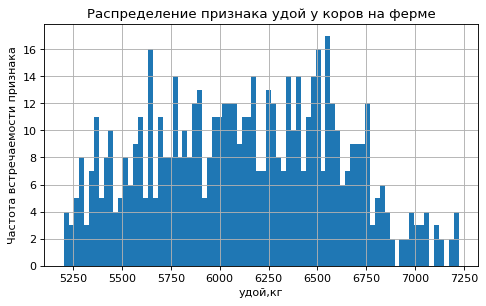

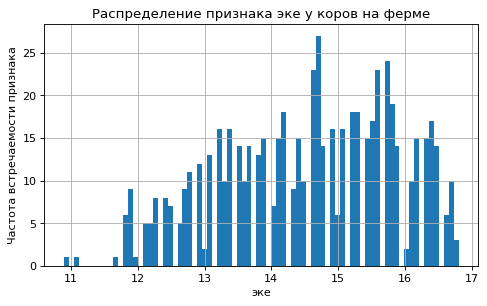

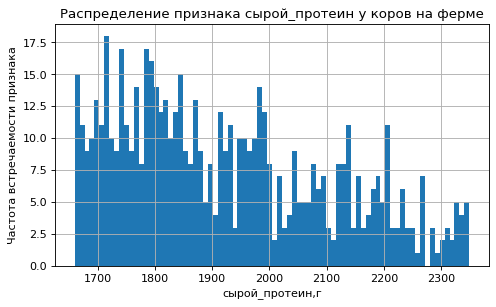

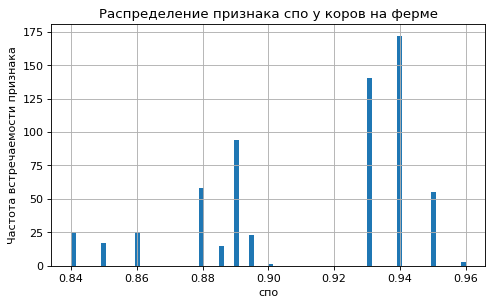

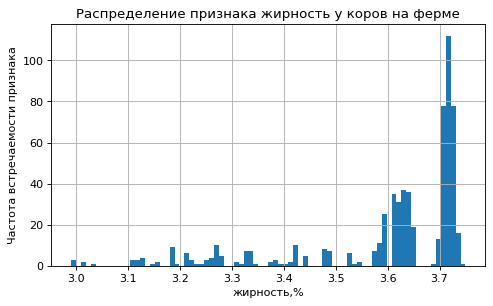

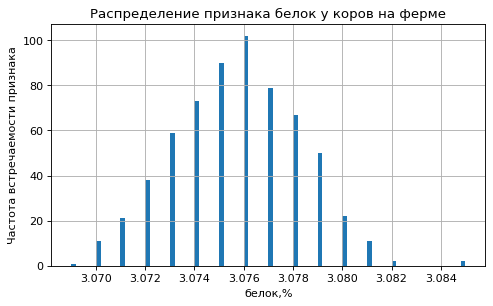

In [32]:
#для дальнейшего удобства сразу всех входных признаков создадим списки с их именами
nm_col_names = ['удой', 'эке', 'сырой_протеин','спо','жирность','белок']
ct_col_names = ['вкус_молока','порода','тип_пастбища','порода_папы_быка','возраст','имя_папы']

#Построим графики для количественных признаков
for c in nm_col_names:
    plt.figure(figsize = (7,4), dpi = 80)
    plt.grid()
    plt.hist(data_ferma[c], bins = 80)
#для отображения необходимой размерности на оси X введем конструкцию if-elif
    if c in ['удой']:
        plt.xlabel(f'{c},кг')
    elif c in ['сырой_протеин']:
        plt.xlabel(f'{c},г')
    elif c in ['жирность','белок']:
        plt.xlabel(f'{c},%')
    else:
        plt.xlabel(f'{c}')
    plt.ylabel('Частота встречаемости признака')
    plt.title(f'Распределение признака {c} у коров на ферме')
    plt.show()

Гистограммы белок, удой и эке похожи на графики нормального распределения, для них будем использоваться корреляцию Пирсона при просмотре зависимости, признаки сырой протиеин, спо и жирность имеют имеют график ненормального распределения, для них корреляцию дополнительно построим при помощи метода Спирмена

Дополнительно посмотрим графики распределения жирности и белка для покупных коров, значений выборки мало, поэтому сравнивать с распределением на ферме смысла нет, строим для визуального ознакомления

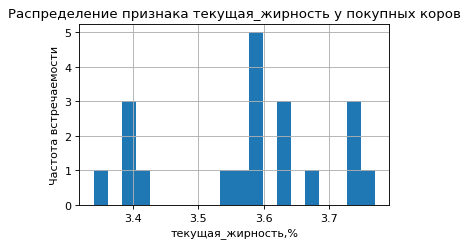

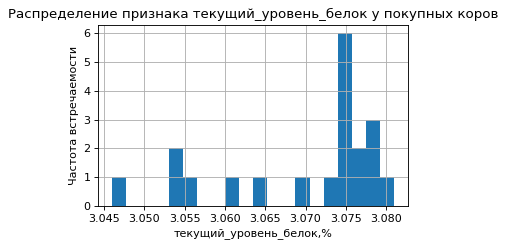

In [33]:
for t in ['текущая_жирность','текущий_уровень_белок']:
    plt.figure(figsize = (5,3), dpi = 80)
    plt.grid()
    plt.hist(data_cow_buy[t], bins = 20)
    plt.xlabel(f'{t},%')
    plt.ylabel('Частота встречаемости')
    plt.title(f'Распределение признака {t} у покупных коров')
    plt.show()

Графики показывают следующее:
- жирность молока коров на ферме из всего диапазона от 3% до 3.7% больше всего встречается в диапазоне 3.6-3.7% , поэтому видимо были отобраны покупные коровы, имеющие процент жирности не ниже 3.3%
- параметр процента белка показывает самый наглядный график нормального распределения
- самые часто встречаемые показатели сахаро-протеинового соотношение - 0,93 и 0,94
- пиковые значения удоя находятся по бокам от среднего значения - 5600 кг и 6550 кг при среднем значении в области 6130 кг. График без наглядных выбросов.
- график ЭКЕ показывает нормальное распределение с выборосом в области 1.1
- график сырого протеина в корме показывает, что с увеличением кол-ва белка в корме уменьшается частота встречаемости такого корма.
- гистограммы белок, удой и эке похожи на графики нормального распределения, для них будем использоваться корреляцию Пирсона при просмотре зависимости, признаки сырой протиеин, спо и жирность имеют имеют график ненормального распределения, для них корреляцию дополнительно построим при помощи метода Спирмена
- сильные выбросы на графиках не присутствуют

Были замечены некоторые особенности:
- у признака `эке` мало значений, меньших 11.5
- у признака `жирность` мало значений меньше 3.1%

Теперь рассмотрим категориальные признаки датафреймов `data_ferma` и `data_cow_buy` для сравнения кол-ва имеющихся и покупных коров по группам, в зависимости от разных признаков

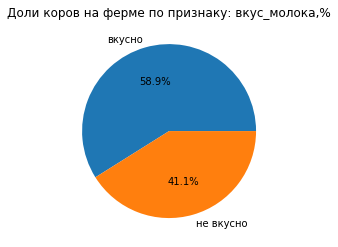

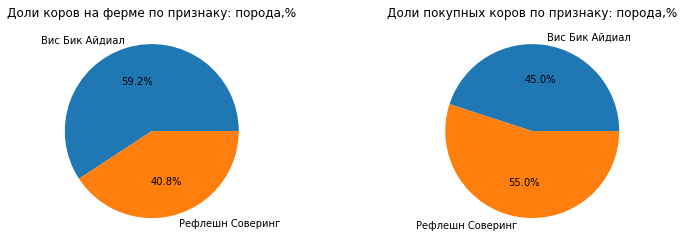

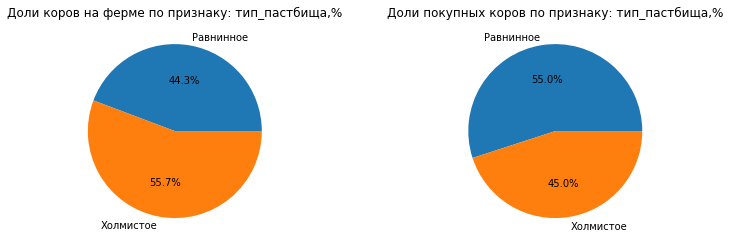

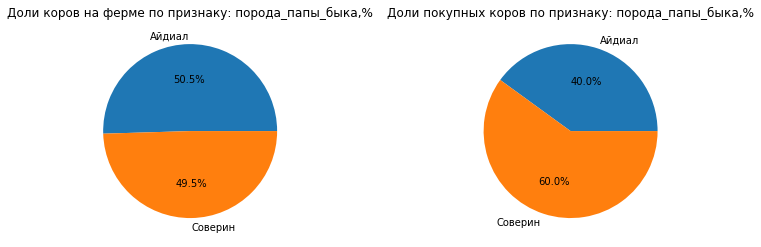

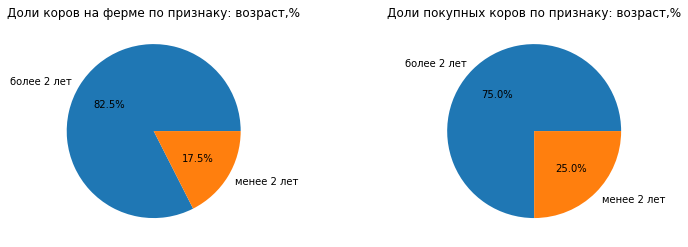

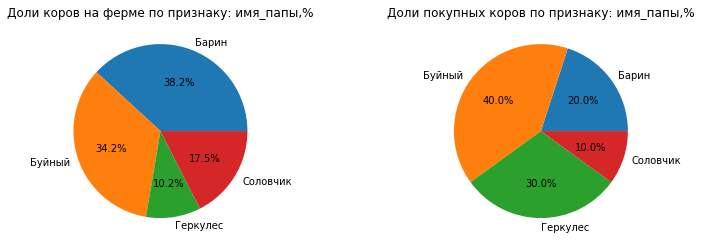

In [34]:
#так как целевой признак - вкус молока, имеется только в датафрейме data_ferma, то используем конструкцию try-except для исключения ошибки
for c in ct_col_names:
    try:
#добавим конструкцию if-else для построения диаграммы, если наименование столбца будет 'имя_папы', тогда нужно будет информацию 
#об именах пап для коров фермера получать из другой таблицы 'data_cow_name'
        if c != 'имя_папы':
            ferma_pie = data_ferma.pivot_table(index = c, values = 'id', aggfunc={'count'}).reset_index()
            cow_buy_pie = data_cow_buy.pivot_table(index = c, values = 'текущая_жирность', aggfunc={'count'}).reset_index()
        elif c == 'имя_папы':
            ferma_pie = data_cow_name.pivot_table(index = 'имя_папы', values = 'id', aggfunc={'count'}).reset_index()
            cow_buy_pie = data_cow_buy.pivot_table(index = c, values = 'текущая_жирность', aggfunc={'count'}).reset_index()
#строим сразу фигуру для двух графиков рядом, чтобы визуально можно было отследить разные показатели между одним признаком        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12.5,4))
        axes[0].pie(ferma_pie['count'], labels = ferma_pie[c], autopct = '%.1f%%')
        axes[0].set_xlabel('')
        axes[0].set_ylabel('')
        axes[0].set_title(f'Доли коров на ферме по признаку: {c},%')

        axes[1].pie(cow_buy_pie['count'], labels = cow_buy_pie[c], autopct = '%.1f%%')
        axes[1].set_xlabel('')
        axes[1].set_ylabel('')
        axes[1].set_title(f'Доли покупных коров по признаку: {c},%')
        plt.show()
#если в одной из таблиц нет одного из входных признаков, то построится график только для первой таблицы с информацией о коровах фермера, 
#где все столбцы из списка есть
    except:
        ferma_pie = data_ferma.pivot_table(index = c, values = 'id', aggfunc={'count'}).\
        plot(kind = 'pie', y = 'count', figsize = (7,4), legend = False, autopct = '%.1f%%')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(f'Доли коров на ферме по признаку: {c},%')
        plt.show()

Полученные диаграммы показывают:

- фермерские коровы по мнению фермера дают вкусное молоко в 58.9%
- на ферме коров породы Вис Бик Айдиал на 20 % больше от общего кол-ва, чем коров породы Рефлешн Соверинг. Покупные коровы наоборот имеют 55% от общего кол-ва коров породы Рефлешн Соверинг, а 45% Вис Бик Айдиал.
- фермерские коровы пасутся немного больше на холмистых пастбищах, чем на холмистых (55.7% против 44.3%). Покупные коровы наоборот больше пасутся на равнине, чем на холмистых лугах (55% против 45%) 
- коровы на ферме имеют практически равно распределение по породам папы быка: Айдиал и Соверин по половине коров. У покупных коров преобладает порода папы быка Соверин - 60%
- возраст больше 2 лет преобладает и у коров на ферме (82.5 от общего кол-ва) и у покупных коров (75%)
 - по именам папы распределение получилось следующим:
 
*коровы на ферме:*

- Барин - 38.2%;
- Буйный 34.2 %;
- Соловчик 17.5%;
- Геркулес 10.2%

*покупные коровы:*

- Буйный - 40 %
- Геркулес 30 %
- Барин 20 %
- Соловчик 10 %

**Полученные графики и статистики показали следующие результаты:**

- Минимальная жирность молока покупных коров выше на 0,35%, чем фермерских, это может быть связано с тем, что у покупных коров эти данные указаны на момент кормления. Медианные значения жирности немного выше у покупных коров, а процент белка на на одном уровне. Среднее значение удоя коров на ферме находится в диапазоне 6130 кг

*Полученные графики показали:*
- жирность молока коров на ферме из всего диапазона от 3% до 3.7% больше всего встречается в диапазоне 3.6-3.7% , поэтому видимо были отобраны покупные коровы, имеющие процент жирности не ниже 3.3%
- параметр процента белка показывает нормальное распределение
- самые часто встречаемые показатели сахаро-протеинового соотношение - 0,93 и 0,94
- пиковые значения удоя находятся по бокам от среднего значения - 5600 кг и 6550 кг при среднем значении в области 6130 кг. График без наглядных выбросов.
- график ЭКЕ показывает нормальное распределение с выборосом в области 1.1
- график сырого протеина в корме показывает, что с увеличением кол-ва белка в корме уменьшается частота встречаемости такого корма.
- гистограммы белок, удой и эке похожи на графики нормального распределения, для них будем использоваться корреляцию Пирсона при просмотре зависимости, признаки сырой протиеин, спо и жирность имеют имеют график ненормального распределения, для них корреляцию дополнительно построим при помощи метода Спирмена
- сильные выбросы на графиках не присутствует


Полученные диаграммы показывают:

- фермерские коровы по мнению фермера дают вкусное молоко в 58.9%
- на ферме коров породы Вис Бик Айдиал на 20 % больше от общего кол-ва, чем коров породы Рефлешн Соверинг. Покупные коровы наоборот имеют 55% от общего кол-ва коров породы Рефлешн Соверинг, а 45% Вис Бик Айдиал.
- фермерские коровы пасутся немного больше на холмистых пастбищах, чем на холмистых (55.7% против 44.3%). Покупные коровы наоборот больше пасутся на равнине, чем на холмистых лугах (55% против 45%) 
- коровы на ферме имеют практически равно распределение по породам папы быка: Айдиал и Соверин по половине коров. У покупных коров преобладает порода папы быка Соверин - 60%
- возраст больше 2 лет преобладает и у коров на ферме (82.5 от общего кол-ва) и у покупных коров (75%)
 - по именам папы распределение получилось следующим:
 
*коровы на ферме:*

- Барин - 38.2%;
- Буйный 34.2 %;
- Соловчик 17.5%;
- Геркулес 10.2%

*покупные коровы:*

- Буйный - 40 %
- Геркулес 30 %
- Барин 20 %
- Соловчик 10 %

Были замечены некоторые особенности:
- у признака `эке` мало значений, меньших 11.5
- у признака `жирность` мало значений меньше 3.1%

## Корреляционный анализ

Построим матрицу корреляции коэффициентов Пирсона для всех количественных признаков для датафрейма `data_ferma`

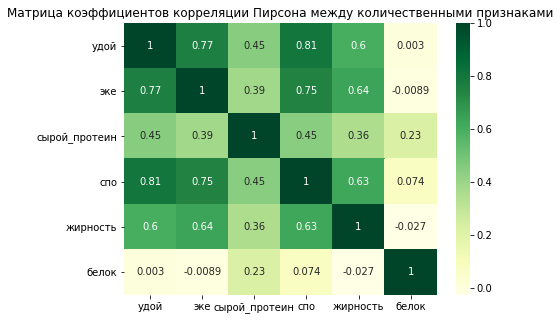

In [35]:
plt.figure(figsize = (7,5))
sns.heatmap(data_ferma[nm_col_names].corr(), annot=True, cmap='YlGn')
plt.title('Матрица коэффициентов корреляции Пирсона между количественными признаками')
plt.show()

Помним, что гистограммы сырой протеин, спо и жирность не похожи на графики нормального распределения, поэтому построим дополнительно матрицу корреляции при помощи метода Спирмена и сравним результаты

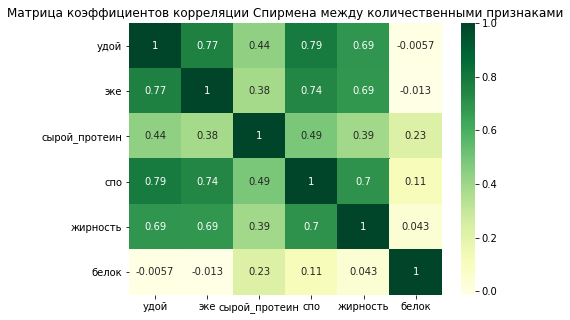

In [36]:
plt.figure(figsize = (7,5))
sns.heatmap(data_ferma[nm_col_names].corr(method='spearman'), annot=True, cmap='YlGn')
plt.title('Матрица коэффициентов корреляции Спирмена между количественными признаками')
plt.show()

Видно, что особых изменений в коэффициентах корреляции между целевым и входными признаками не наблюдается

Составим матрицу коэффициентов корреляции для всех признаков. Воспользуемся матрицей корреляции из библиотеки `phik`

interval columns not set, guessing: ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


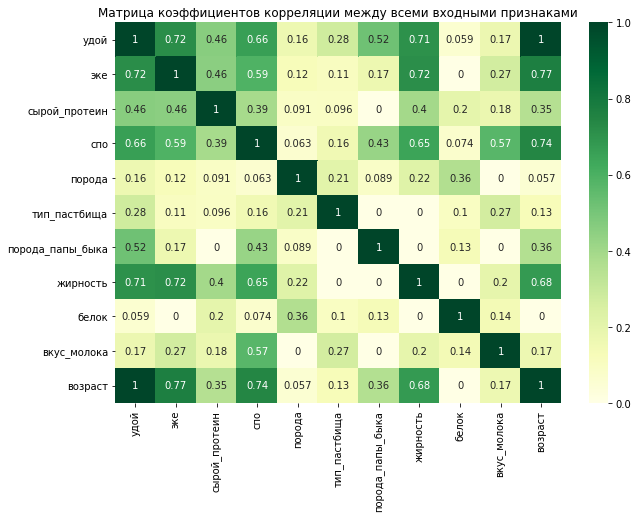

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(data_ferma.loc[:,'удой':].phik_matrix(), annot=True, cmap='YlGn')
plt.title('Матрица коэффициентов корреляции между всеми входными признаками')
plt.show()

Значения для количественных признаков между первой матрицей (Пирсона) и последней (коэффициент фи), построенных разным способом, могут отличаться до 0.2, но не сильно искажают итоговые результаты, это связано с неллинейной корреляцией между целевым и входными признаками. Из категориальных признаков больше всего выделяются тесной взаимосвязью  с удоем `возраст` с коэффициентом корреляции 1 и `порода папы быка` с 0.52

Для более детального изучения взаимосвязи построим матрицу рассеяния между всеми количественными признаками датафрейма `data_ferma` с указанием по группам

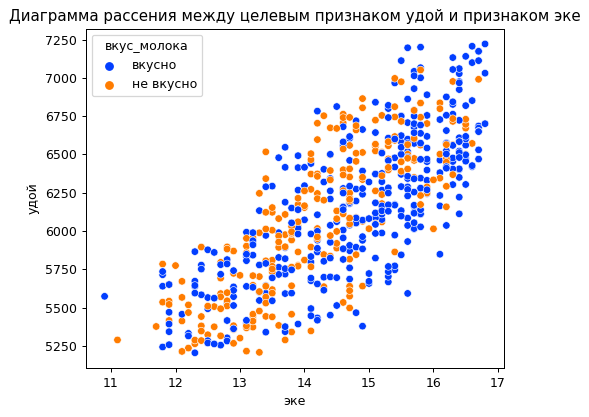

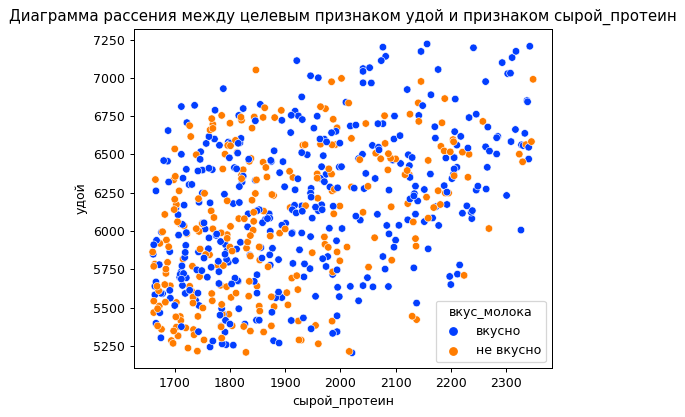

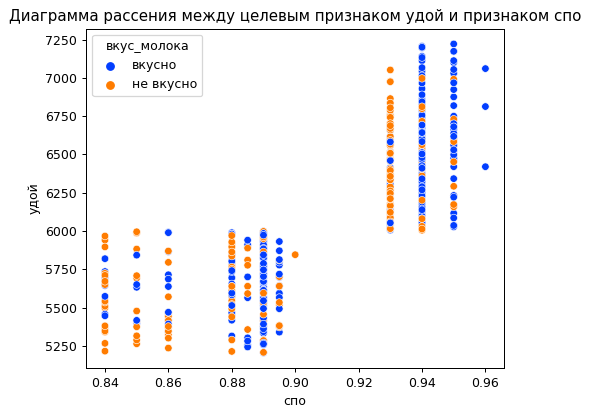

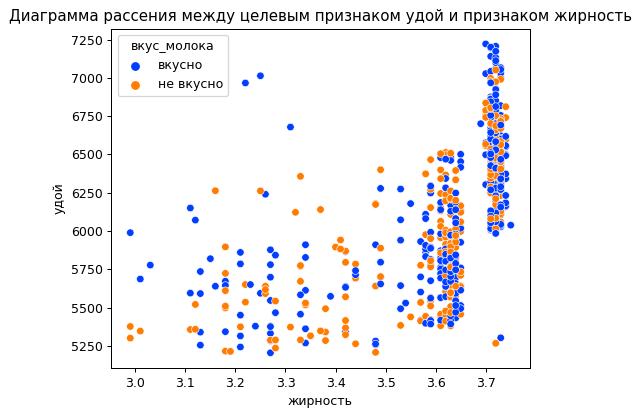

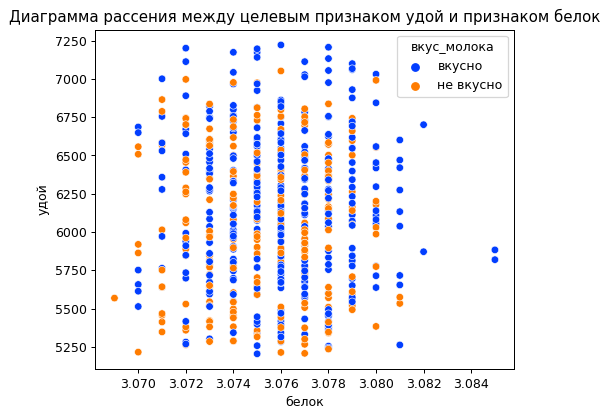

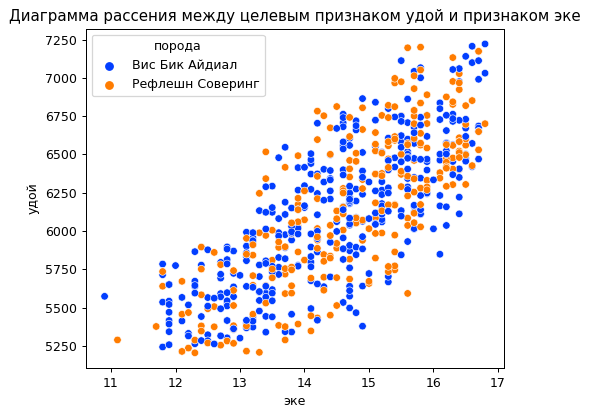

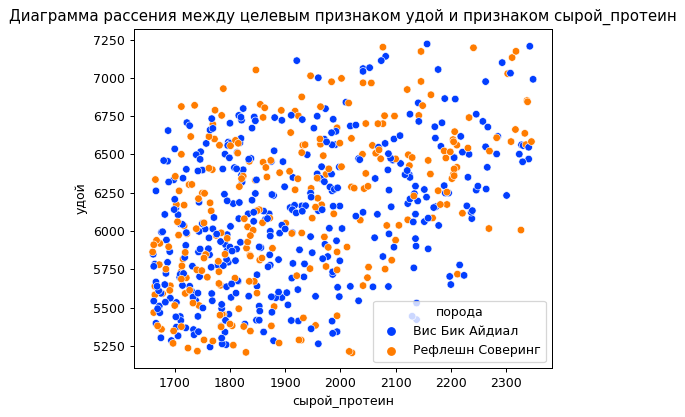

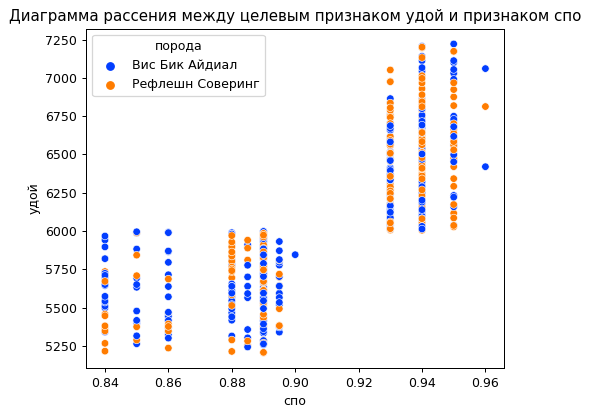

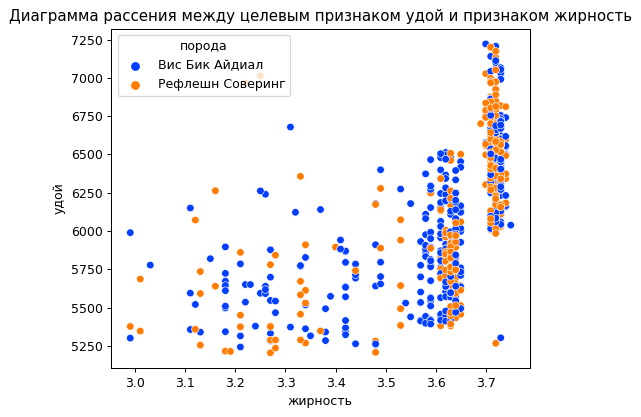

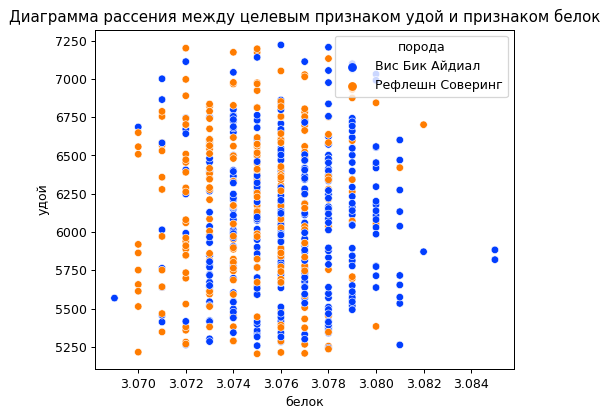

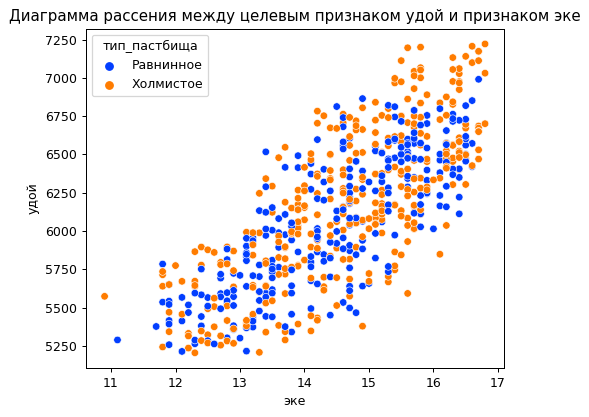

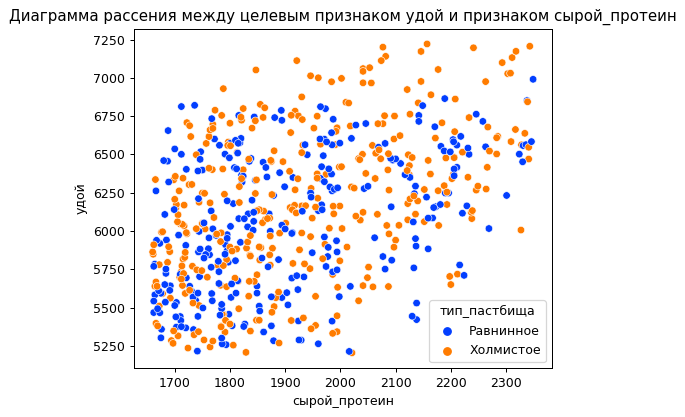

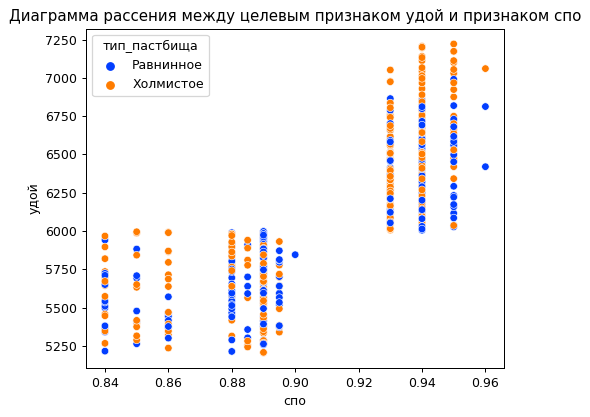

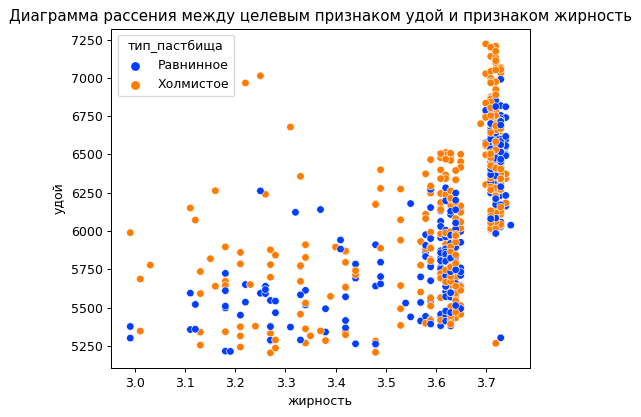

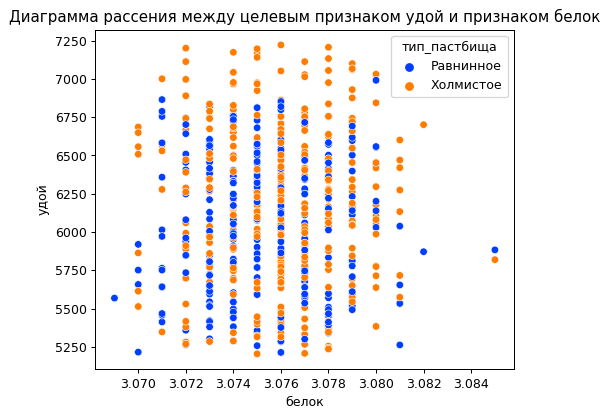

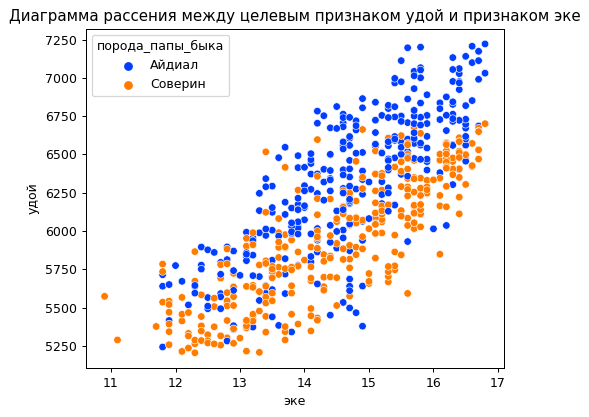

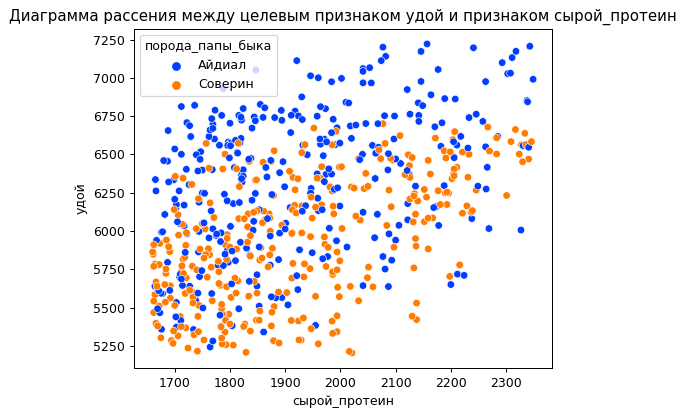

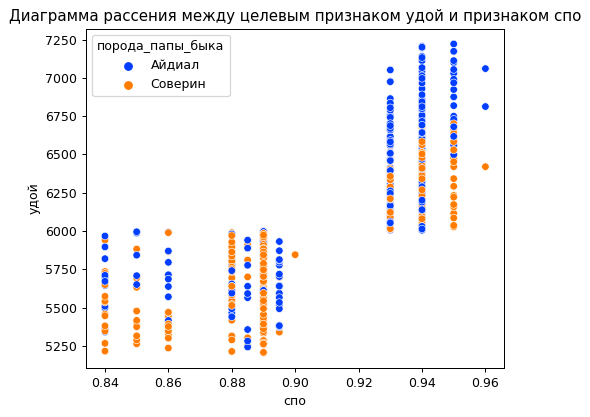

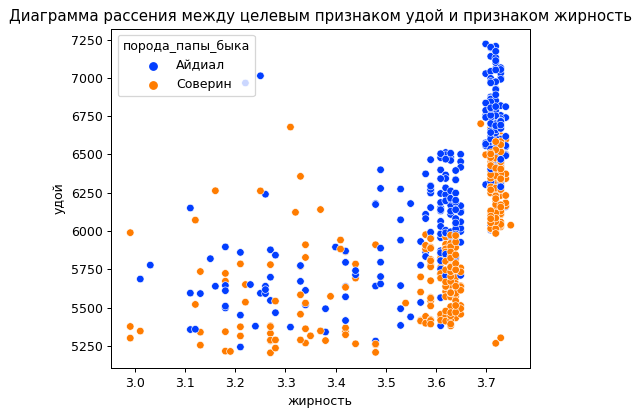

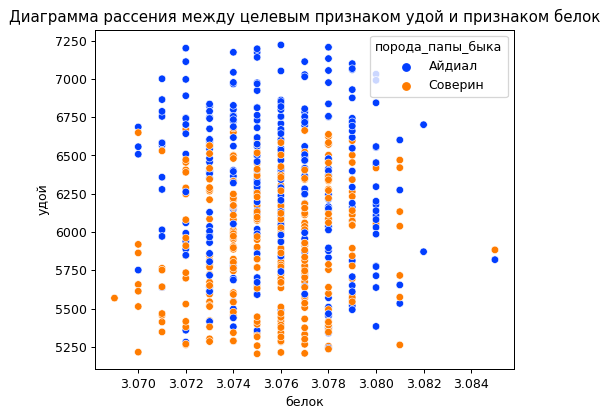

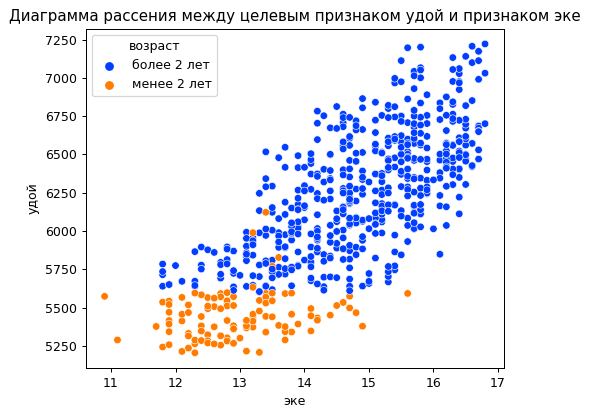

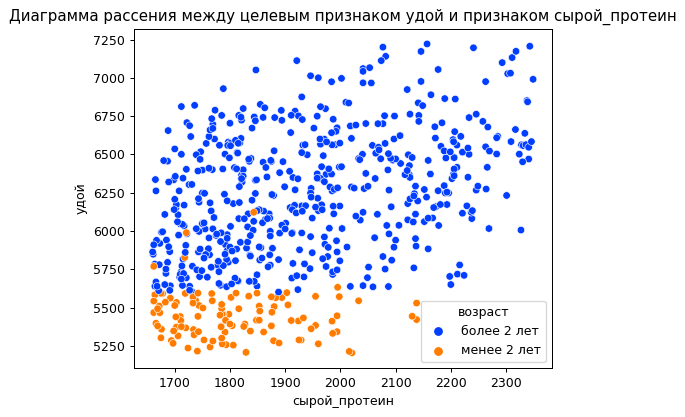

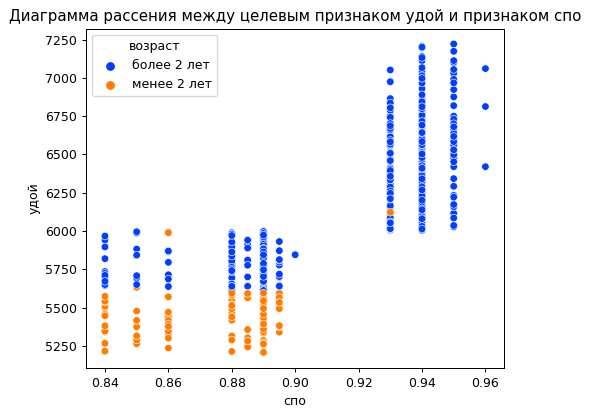

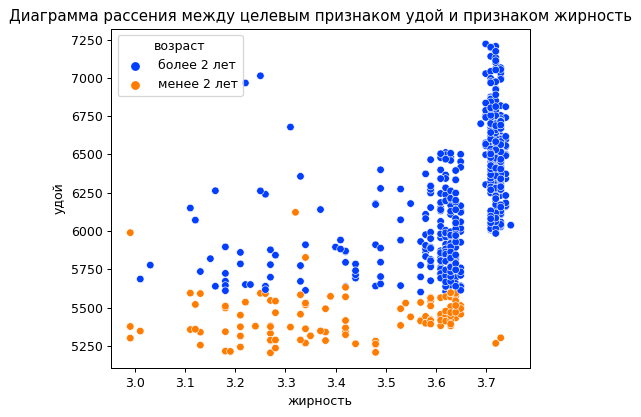

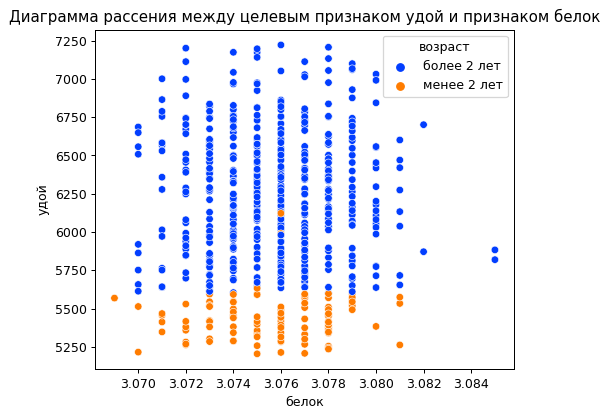

In [38]:
for c in ct_col_names[:5]:
    for n in nm_col_names[1:]:
        plt.figure(figsize = (6,5), dpi = 90)
        sns.scatterplot(
            x=n,
            y='удой', 
            data=data_ferma.loc[:,'удой':],
            palette='bright',
            hue=c,
            legend = 'full')
        plt.title(f'Диаграмма рассения между целевым признаком удой и признаком {n}')
        plt.show()

**Полученные матрицы корреляции  позволяют сделать следующие выводы**

*Между целевым и количественными входными признаками наблюдается корреляционный линнейный тип зависимости, с разными характеристиками связи:*

- тесной между удоем и ЭКЕ, удоем и СПО
- заметной между удоем и жирностью
- умеренной между удоем и концентрацией сырого протеина в корме, удоем и породой папы быка
- слабой между удоем и породой, удоем и типом пастбища, удоем и вкусом молока

*Нелинейная связь наблюдается между удоем и белком, так как их коэффициент корреляции практически равен 0*

*Между целевым признаком удой и входным признаком возраст наблюдается очень сильная связь, показатель корреляции 1, такая связь может навредить обучению модели, можно попробовать обучить модель с этим входным признаком и без*

*Есть дополнительный признак имя папы, который можно ввести в дальнейшем, чтобы улучшить показания модели*

*Между входными признаками не наблюдается мультиколлинеарности*

**Построенные графики подчеркивают несколько особенностей:**
- удой больше 5600 кг дают только коровы возрастом более 2 лет
- при СПО больше 0.92 коровы дают самые высокие показатели удоя более 6000 кг, при СПО 0.95 показатели удоя доходят пиковых значений удоя в 7250 кг
- СПО выше 0.92 дают только коровам с возрастом больше 2 лет
- при СПО с показателем 0.93 в большинстве получается невкусное молоко, при СПО 0.93 и 0.94 молоко в большинстве случаев получается вкусным, из СПО менее 0.9 самым вкусным является молоко с показателем СПО 0.89
- коровы больше всего дают  молоко с самым высоким показателем жирности, 3.6% и 3.7%
- больше всего зависимость между целевым признаком удой проявляется к признаку ЭКЕ и СПО
- у коров породы Вис Бик Айдиал содержание белка в молоке выше, чем у Рефлешн Соверинг
- содержание сырового протеина в корме выше у коров,, пасущихся на холмистых пастбищах
- удой выше 6900 кг дают только коровы, пасущиеся на холмистых пастбищах
- у коров с породов папы быка Айдиал намного выше удой при одинаковых показателях ЭКЕ, сырого протеина в корме и СПО, только при СПО 0.89 удой выше у коров с породой папы быка Соверин

## Обучение модели линейной регрессии

### Построение первой модели линейной регрессии

Сперва подготовим данные, отберем нужные входные признаки и запишем их в отдельные переменные для количественных признаков и категориальных:
- id с "именами" коров не несет пользы для построения модели его использовать не будем.
- также не нужны характеристики, которые можно получить уже после того, как молоко получено: жирность, белок и вкус молока
- характеристики корма коровы влияют на получаемый удой (эке, спо и сырой протеин)
- также сильно на объем удоя влияет возраст (гистограмма дала четкое понимание, что нужен возраст больше 2 лет для такого объема удоя)
- порода папы коровы тоже сильно влияет на удой в соответствии с полученными гистограммами (Айдиал намного больше дает объем удоя)
- также на удой влияет тип пастбища (только коровы с типом пастбища холмистое дают удой больше 7000 кг)
- тип породы самой коровы не так сильно влияет, как порода папы, коэффициент корреляции всего 0.16, можно поробовать построить можель с ним и без него

Создадим списки с необходимыми столбцами для нашей модели

In [39]:
num_col_names = ['эке','сырой_протеин','спо']
cat_col_names = ['порода','тип_пастбища','порода_папы_быка','возраст']

Разобьем датафрейм на тренировочную и тестовую выборки и проверим кол-во уникальных значений в каждом столбце с категориальным признаком

In [40]:
#создание константы  RANDOM_STATE для фиксации порядка элементов в случайном наборе данных, число может быть любым
RANDOM_STATE = 42

#создание тренировочной и тестовой выборки
X = data_ferma.drop(['удой','id','жирность','белок','вкус_молока'], axis = 1)
y = data_ferma['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state = RANDOM_STATE
)

#проверяем кол-во уникальных значений в каждом категориальном столбце
print(X_train[cat_col_names].nunique())

порода              2
тип_пастбища        2
порода_папы_быка    2
возраст             2
dtype: int64


В каждом наборе по 2 значения, теперь проанализиаруем количественные признаки с помощью частотных гистограмм и диаграмм рахмаха


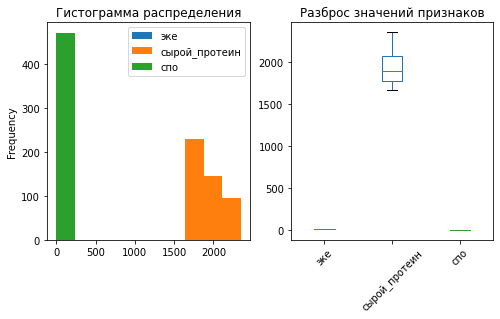

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Видно, что у данных разные масштабы, закодируем категориальные признаки  при помощи `OneHotEncoder`,  отмасштабируем количественные значения методом `StandardScaler`,  объединим в новый датафрейм и проверим проведенные манипуляции

In [42]:
encoder = OneHotEncoder(drop='first', sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


Проверим правильность масштабирования количественных значений

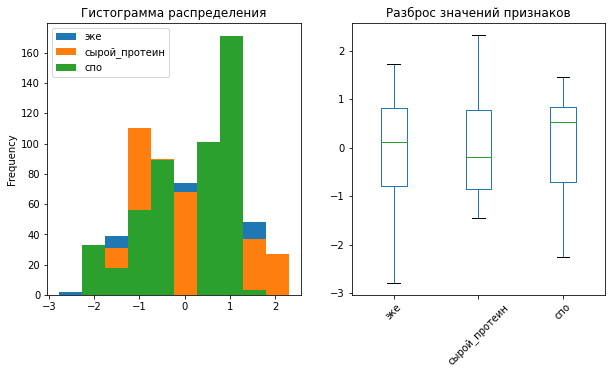

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()


Данные подготовлены, обучим модель и посчитаем метрику R2

R2 LinearRegression = 0.784


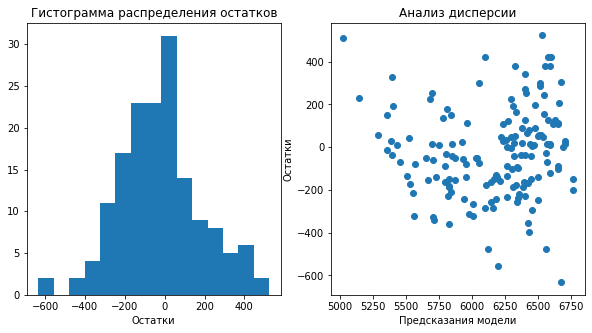

In [44]:
#обучим модель и сделаем предсказания целевого признака
model_lr  = LinearRegression()
model_lr = model_lr.fit(X_train,y_train)
predictions = model_lr.predict(X_test)

#расчитаем метрику R2 и выведем ее на экран
r2 = r2_score(y_test, predictions)
print(f"R2 LinearRegression = {r2:.3f}")

#проведем анализ остатков, посторим гистограмму распределения остатков и диаграмму рассеяния
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=15)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Первая модель линейной регрессии дала следующие результаты:**
- модель предсказывает правильное значение в 78.4% случаев, необходимо добавить, изменить или убрать входные признаки, чтобы улучить показать R2
- гистограмма распределения остатков показывает похожее на нормальное распределение, это значит, что остатки стремятся к нулевому значению, с небольшим смещением в сторону более завышенных предсказанных значений, нужно улучшать разброс остатков
- анализ дисперсии показывает, что график похож на "рупор", это значит, что модель может работать неустойчиво, поскольку разброс  остатков непостоянен

### Построение второй модели линейной регрессии

Необходимо убрать нелинейность между целевым признаком `удой` и входными признаками. По диаграмме рассеяния удой от СПО видно, что они связаны неллинейно и при значении СПО меньше, чем 0.92, величина удоя всегда меньше 6000 кг. Используем границу величины удоя в 6000кг для того, чтобы преобразовать признак СПО в категориальный бинарный со следующими значениями: все  значения СПО < 0.92 станут '0', а все значения СПО > 0.92 станут 1. Создадим для этого копию нашего датафрейма и в ней будем вносить изменения

In [45]:
data_ferma_model_2 = data_ferma.copy()
data_ferma_model_2.head(5)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет


Заменим значения в столбце `СПО` на 0, если его значение составляет ниже 0.92 и на 1, если значение столбца выше 0.92

In [46]:
for row in data_ferma_model_2.index:
    if data_ferma_model_2.loc[row,'спо'] < 0.92:
        data_ferma_model_2.loc[row,'спо'] = 0
    else:
        data_ferma_model_2.loc[row,'спо'] = 1

Проверим получившуюся замену

In [47]:
data_ferma_model_2.head(10)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет
5,6,5254,12.7,1806,0.0,Рефлешн Соверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее 2 лет
6,7,5910,13.2,1792,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,вкусно,более 2 лет
7,8,6179,14.7,1806,1.0,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,вкусно,более 2 лет
8,9,6783,14.2,1918,1.0,Рефлешн Соверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более 2 лет
9,10,5339,13.4,1791,0.0,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее 2 лет


Построим повторно коэффициенты корреляции между целевым признаком `удой` и входным признаком `спо`

In [48]:
print(f"Коэффициент корреляции между удой и спо до: {data_ferma['удой'].corr(data_ferma['спо'])}")
print(f"Коэффициент корреляции между удой и спо после: {data_ferma_model_2['удой'].corr(data_ferma_model_2['спо'])}")                                                 

Коэффициент корреляции между удой и спо до: 0.8063389252912262
Коэффициент корреляции между удой и спо после: 0.8342431244356762


Теперь исключим нелинейность между `удой` и `эке`,  возведя в квадрат значения столбца `эке`

In [49]:
data_ferma_model_2['эке'] = data_ferma_model_2['эке'].pow(2.)
data_ferma_model_2.head(5)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,201.64,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,163.84,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,196.00,1854,0.0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,153.76,2012,0.0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,163.84,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет


Построим повторно коэффициенты корреляции между целевым признаком `удой` и входным признаком `эке`

In [50]:
print(f"Коэффициент корреляции между удой и спо до: {data_ferma['удой'].corr(data_ferma['эке'])}")
print(f"Коэффициент корреляции между удой и спо после: {data_ferma_model_2['удой'].corr(data_ferma_model_2['эке'])}") 

Коэффициент корреляции между удой и спо до: 0.7650977877344268
Коэффициент корреляции между удой и спо после: 0.7655300782523312


Сравним диаграммы рассеяния до изменения и после,

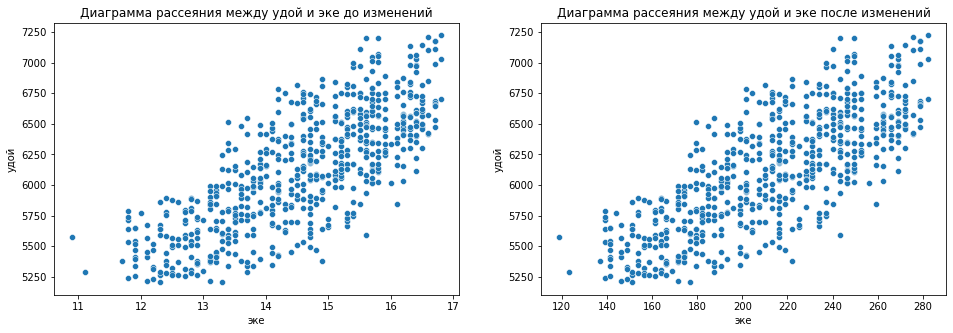

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.scatterplot(x='эке',y='удой', data=data_ferma,legend = 'full', ax = axes[0])
axes[0].set_title('Диаграмма рассеяния между удой и эке до изменений')

sns.scatterplot(x='эке',y='удой', data=data_ferma_model_2,legend = 'full', ax = axes[1])
axes[1].set_title('Диаграмма рассеяния между удой и эке после изменений')
plt.show()

Графики в таком масштабе выглядят одинаково, но диапазон значений по `эке` увеличился с 11-17 до 120-280

Построим и обучим вторую модель линейной регрессии с данными из обновленного датафрейма `data_ferma_model_2`, так как теперь признак `спо` стал категориальными, то перенесем его в  переменную `cat_col_names` с категориальными столбцами

R2 LinearRegression = 0.818


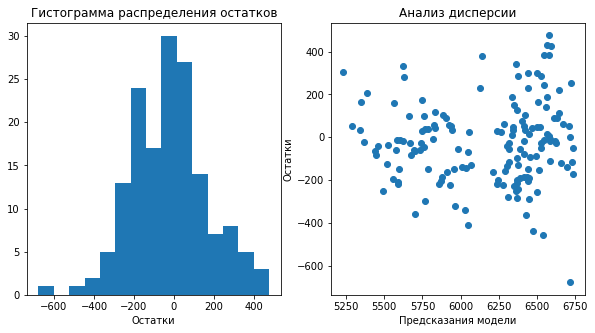

In [52]:
num_col_names = ['эке','сырой_протеин']
cat_col_names = ['порода','тип_пастбища','порода_папы_быка','возраст','спо']

RANDOM_STATE = 42

X = data_ferma_model_2.drop(['удой','id','жирность','белок','вкус_молока'], axis = 1)
y = data_ferma_model_2['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state = RANDOM_STATE
)

encoder = OneHotEncoder(drop='first', sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучим модель и сделаем предсказания целевого признака
model_lr_2  = LinearRegression()
model_lr_2 = model_lr_2.fit(X_train,y_train)
predictions_2 = model_lr_2.predict(X_test)

#расчитаем метрику R2 и выведем ее на экран
r2_2 = r2_score(y_test, predictions_2)
print(f"R2 LinearRegression = {r2_2:.3f}")

#проведем анализ остатков, посторим гистограмму распределения остатков и диаграмму рассеяния
residuals_2 = y_test - predictions_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2, bins=15)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions_2, y = residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вторая модель линейной регрессии при устранении неллинейности дала следующие результаты:**
- R2 стал лучше, модель правильно определяет значение целевого признака в 81.8% случаев, что на 3% выше, чем у первой модели
- остатки стали больше стремится к нулевому значению с меньшим смещением по сторонам
- дисперсия практически не изменилась


### Построение третьей модели линейной регрессии

Так как вторая модель показала результат R2 лучше, чем первая, то за основу нового датафрейма возьмем датафрейм второй модели `data_ferma_model_2`, в котором мы убирали неллинейность

Добавим в таблицу новый признак `имя папы` из таблицы data_cow_name, в качестве ключа выберем столбец с "именем" коровы id``

In [53]:
data_ferma_model_3 = data_ferma_model_2.merge(data_cow_name, on='id', how='left')
data_ferma_model_3

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,имя_папы
0,1,5863,201.64,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,Буйный
1,2,5529,163.84,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,Соловчик
2,3,5810,196.00,1854,0.0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,Барин
3,4,5895,153.76,2012,0.0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,Буйный
4,5,5302,163.84,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,237.16,1964,1.0,Рефлешн Соверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более 2 лет,Буйный
624,626,5513,166.41,1700,0.0,Рефлешн Соверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее 2 лет,Барин
625,627,5970,207.36,1837,0.0,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет,Барин
626,628,5746,190.44,1994,0.0,Рефлешн Соверинг,Равнинное,Соверин,3.64,3.077,вкусно,более 2 лет,Барин


Проверим пропуски в таблице

In [54]:
data_ferma_model_3.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
имя_папы            0
dtype: int64

Построим третью модель линейной регрессии

R2 LinearRegression for model 3 = 0.825


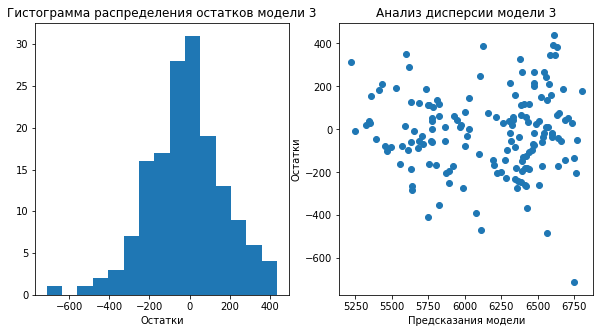

In [55]:
num_col_names = ['эке','сырой_протеин']
cat_col_names = ['порода','тип_пастбища','порода_папы_быка','возраст','имя_папы','спо']

RANDOM_STATE = 42

X = data_ferma_model_3.drop(['удой','id','жирность','белок','вкус_молока'], axis = 1)
y = data_ferma_model_3['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state = RANDOM_STATE
)

encoder = OneHotEncoder(drop='first', sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучим 3 модель и сделаем предсказания целевого признака
model_lr_3  = LinearRegression()
model_lr_3 = model_lr_3.fit(X_train,y_train)
predictions_3 = model_lr_3.predict(X_test)

#расчитаем метрику R2 и выведем ее на экран
r2_3 = r2_score(y_test, predictions_3)
print(f"R2 LinearRegression for model 3 = {r2_3:.3f}")

#проведем анализ остатков, посторим гистограмму распределения остатков и диаграмму рассеяния
residuals_3 = y_test - predictions_3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3, bins=15)
axes[0].set_title('Гистограмма распределения остатков модели 3')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions_3, y = residuals_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии модели 3')
plt.show()

**Третья модель при добавлении признака имя папы показала следующие результаты:**
- показатель R2 стал еще немного выше 0.825%
- распределение остатков выглядит нормальным без особых перекосов в стороны, самые часто встречающиеся значения еще больше стали стремиться к 0
- разброс остатков стал более постоянен, но есть значение в остатке при -600, которое не повторяется больше нигде на всем протяжении

### Сравнение трех полученных моделей 

Сравним показатели R2 и графики остатков для всех трех обученных моделей

R2 LinearRegression for model 1 = 0.784


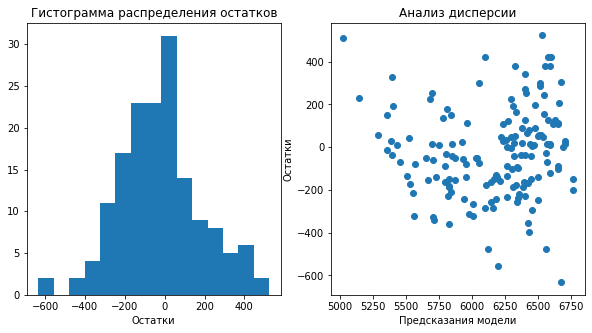

R2 LinearRegression for model 2 = 0.818


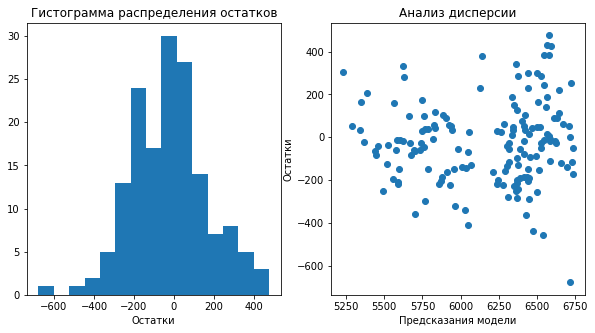

R2 LinearRegression for model 3 = 0.825


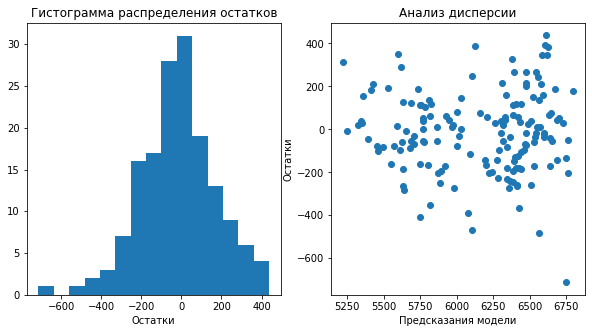

In [56]:
i = 1
for e,p,r in (r2, predictions, residuals), (r2_2, predictions_2, residuals_2),(r2_3, predictions_3, residuals_3):
    print(f"R2 LinearRegression for model {i} = {e:.3f}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(r, bins=15)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    
    axes[1].scatter(x = p, y = r)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    i += 1

Посчитаем метрики MSE, MAE, RMSE для всех трех моделей

In [57]:
i = 1
for m in predictions, predictions_2, predictions_3:
    print(f'Метрики для модели {i} \n')
    print(f'MSE = {mean_squared_error(y_test, m)}')
    print(f'RMSE = {mean_squared_error(y_test, m, squared=False)}') 
    print(f'MAE =  {mean_absolute_error(y_test, m)} \n')
    i += 1

Метрики для модели 1 

MSE = 43887.015009660514
RMSE = 209.4922791170608
MAE =  164.24194463474925 

Метрики для модели 2 

MSE = 37030.91131113695
RMSE = 192.43417396901452
MAE =  149.03965222364602 

Метрики для модели 3 

MSE = 35673.88988618191
RMSE = 188.8753289505591
MAE =  146.1630244536231 



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**При сравнении графиков распределения остатков и дисперсии трех моделей были получены следующие результаты:**
- показатели R2 увеличивались от модели к модели: 78.4%, 81.8% и у третьей модели самый лучший показатель - 82.5%.
- гистограмма распределения остатков у первой модели имела смещение слева от нуля, что говорило о более завышенных предсказаниях модели, у третьей модели такого недостатка нет, также по сранению с графиком второй модели самые часто встречающиеся значения еще больше стали стремиться к 0
- разброс остатков у третьей и второй модели стал более постоянен на небольшую величину, но есть значение в остатке при -600, которое не повторяется больше нигде на всем протяжении
- по расчетам метрик видно, что третья модель точнее остальных рассчитывает прогнозное значение целевого признака, каждая метрика показывает, что третья модель в среднем ошибается на меньшее значение.

### Нахождение доверительного интервала

Для начала посмотрим межквартильный размах, показывающий диапазон, в который попадают самые часто встречащиеся значения ошибок (50% от общего количества)

In [58]:
print(f'Межквартильный размах ошибок третьей модели составляет: {stats.iqr(y_test - predictions_3)}')

Межквартильный размах ошибок третьей модели составляет: 256.4087442801774


Теперь расчитаем доверительный интервал для попадания 95% всех ошибок, для этого вычтем из 97.5 квантиля 2.5 квантиль. Сначала получим описание массива с ошибками

In [59]:
#создаем Series со значениями ошибок модели и выводим описание
errors_model_3 = (y_test - predictions_3)
errors_model_3.describe()

count    157.000000
mean     -15.201522
std      188.865034
min     -712.793903
25%     -144.381634
50%      -15.967703
75%      112.027110
max      437.597704
Name: удой, dtype: float64

Вычтем из 97.5 квантиля 2.5 квантиль и разделим его на два, чтобы можно было записать значение нашего прогнозного удоя +- половина значения доверительного интервала

In [60]:
conf_interval = round((np.percentile(errors_model_3,97.5)-np.percentile(errors_model_3,2.5)),2)
print(f"Доверительный интервал, в который попадает 95 % всех ошибок модели равен {conf_interval} кг")

Доверительный интервал, в который попадает 95 % всех ошибок модели равен 749.04 кг


Получили интервал разброса ошибок, в который попадает 95% всех ошибок модели. Он необходим для определения нижней и верхней границ прогнозного удоя (прогнозное значение +- половина доверительного интервала), в 95% случаев прогноз модели не будет ниже, чем прогноз минус половина доверительного интервала.

Дополнительно найдем доверительный интервала среднего значения ошибки с вероятностью 95%

In [61]:
error_mean = errors_model_3.mean()
error_std = errors_model_3.std()
error_size = errors_model_3.count()
confidence_level = 0.95

#значение из таблицы z значений при уровне достоверности в 95%, уровень достоверности выбрал сам
z_value = 1.960
 
margin_of_error = z_value * (error_std / (error_size**0.5))
 
low_limit = error_mean - margin_of_error
up_limit = error_mean + margin_of_error
 
print(f"Доверительный интервал прогноза величины средней ошибки для  уровня достоверности в 95 %: ({low_limit:.2f}, {up_limit:.2f})")

Доверительный интервал прогноза величины средней ошибки для  уровня достоверности в 95 %: (-44.74, 14.34)


*Получается в интервале от -44.74 кг до 14.34 кг с заданной степенью вероятности в 95% попадет среднее значение ошибки прогнозного удоя модели в -15 кг.*

**Были получены два доверительных интервала:**
    
*Получили доверительный интервал в 749.04 кг, в который попадает 95% всех ошибок модели.*

*Также получили, что доверительный интервал, куда с вероятностью 95% попадет среднее значение ошибки в -15 кг, равен интервалу от -44.74 кг до 14.34 кг*

### Прогнозирование удоя покупных коров

Спрогнозируем удой покупных коров, данные о которых находятся в датафрейме `data_cow_buy`. Первоначально необходимо добавить недостающие характеристики, коэффициенты для которых подсчитаны моделью: `эке`,`сырой_протеин`,`спо`. Данные возьмем из таблицы 
`data_ferma`.

In [62]:
data_cow_buy_pred = data_cow_buy.copy()
data_cow_buy_pred.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


Добавляем столбцы `эке`,`сырой_протеин`,`спо`, взяв средние значения из таблицы data_ferma и увеличив их на 5%

In [63]:
for e in ['эке','спо','сырой_протеин']:
    data_cow_buy_pred[e] = data_ferma[e].mean()*1.05
data_cow_buy_pred.head(7)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,спо,сырой_протеин
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,15.276162,0.958744,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,15.276162,0.958744,2019.947532
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,15.276162,0.958744,2019.947532
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,15.276162,0.958744,2019.947532
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,15.276162,0.958744,2019.947532
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,15.276162,0.958744,2019.947532
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,15.276162,0.958744,2019.947532


Также, как и в тренировочной и тестовой выборке, необходимо подготовить данные, убираем неллинейность между удоем и спо (спо превращаем в бинарный признак), между удоем и эке (возводим эке в квадрат), так как мы это делали при подготовке датафрейма для 3 модели

In [64]:
for row in data_cow_buy_pred.index:
    if data_cow_buy_pred.loc[row,'спо'] < 0.92:
        data_cow_buy_pred.loc[row,'спо'] = 0
    else:
        data_cow_buy_pred.loc[row,'спо'] = 1
data_cow_buy_pred['эке'] = data_cow_buy_pred['эке'].pow(2.)

In [65]:
data_cow_buy_pred.head(7)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,спо,сырой_протеин
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,233.361138,1.0,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,233.361138,1.0,2019.947532
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,233.361138,1.0,2019.947532
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,233.361138,1.0,2019.947532
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,233.361138,1.0,2019.947532
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,233.361138,1.0,2019.947532
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,233.361138,1.0,2019.947532


Получаем прогнозы удоя, используя обученные трансформеры

In [66]:
#напоминалка
#num_col_names = ['эке','сырой_протеин']
#cat_col_names = ['порода','тип_пастбища','порода_папы_быка','возраст','имя_папы','спо']

#используем encoder и scaler, обученные при построении третьей модели
cow_buy_ohe = encoder.transform(data_cow_buy_pred[cat_col_names])
cow_buy_scaled = scaler.transform(data_cow_buy_pred[num_col_names])

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

cow_buy = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

#получаем прогноз удоя покупных коров при помощи третьей модели
predictions_milk = model_lr_3.predict(cow_buy)

Посмотрим на получившийся массив

In [67]:
predictions_milk

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

**Все прогнозные значения получились больше 6000 кг, теперь самое главное, сколько из них будет вкусным, так как это был основной критерий фермера.**

**На этапе построения моделей регрессии были сделаны сделующие действия:**
- было построено 3 модели линейной регресии:
    - первая модель основывалась на предобработанных данных основного датафрейма `data_ferma`, разные комбинации столбцов в качестве входных признаков особой прогрессии в улучшении модели не дали
    - при построении второй модели были убраны неллинейности между целевым признаком `удой` и входным признаком `спо` и между целевым признаком `удой` и входным признаком `эке`.
    - при построении третьей модели в качестве входного признака был добавлен признак `имя_папы`.
    
**Полученные модели линейной регрессии имели следующие различия и значения:**
- показатель R2 увеличивался от модели к модели: 78.4%, 81.8% и у третьей модели самый лучший показатель - 82.5%.
- гистограмма распределения остатков у первой модели имела смещение слева от нуля, что говорило о более завышенных предсказаниях модели, у третьей модели такого недостатка нет, также по сранению с графиком второй модели самые часто встречающиеся значения еще больше стали стремиться к 0
- разброс остатков у третьей и второй модели стал более постоянен на небольшую величину, но есть значение в остатке при -600, которое не повторяется больше нигде на всем протяжении
- по расчетам метрик видно, что третья модель точнее остальных рассчитывает прогнозное значение целевого признака, каждая метрика показывает, что третья модель в среднем ошибается на меньшее значение.
- полученные прогнозные значения удоя для покупных коров у всех получились больше 6000 кг. 
- полученные метрики 3 лучшей модели составили следующие значения:
    - R2 = 0.825
    - MSE = 35673.88988618191
    - RMSE = 188.8753289505591
    - MAE =  146.1630244536231 
- стобцы для построения третьей модели, при которых получились лучшие метрики, оказались следующими:
     - столбцы с количественными признаками -  'эке','сырой_протеин'
     - столбцы с категориальными признаками - 'порода','тип_пастбища','порода_папы_быка','возраст','имя_папы','спо'

**Были расчитаны два доверительных интервала:**

- доверительный интервал в 749.05 кг, в который попадает 95% всех ошибок модели.

- доверительный интервал от -44.74 кг до 14.34 кг, в который с вероятностью 95% попадет среднее значение ошибки в -15 кг


## Обучение модели логистической регрессии

### Построение модели и подбор входных параметров

В качестве целевого признака у нас будет такой параметр, как `вкус_молока`, основанный на субъективном мнении фермера. Для начала необходимо отобрать признаки, которые мы сопоставим целевому:
- столбец `id` с 'именем' коровы не влияет на вкус молока
- `порода_коровы`, `порода_папы_коровы` и тем более `имя_папы` не должны влиять на вкус молока, тому подтверждение таблица корреляции , между вкусом молока и признаками  `порода_коровы` и `порода_папы_коровы` коэффициент корреляции 0
- при величине небольшого значения `удой` вкус молока может быть более густоватый и насыщенный, при большом же количестве удоя молоко наоборот может иметь водянистую труктуру, что может влиять на вкус молока. Сам столбец удой был целевым признаком в предыдущей модели и поэтому сейчас при обучении модели мы можем использовать реальные значения удоя, а когда будет этап тестирования, то добавим в таблицу с покупными коровами прогнозные значения удоя (так как порядок столбцов и наименование стобцов при передаче столбцов при прогнозе `predict` должны быть идентичными с теми, которые были на тренировочном этапе, иначе будет ошибка).
- на вкус молока должны влиять характеристики корма, который ей дают - это столбцы `эке`, `спо`, `сырой_протеин`
- так как содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм, то эти две характеристики - `текущая жирность` и `текущий_уровень_белок` также должны влиять на субъективное мнение фермера, так как это значение с учетом такого же корма, что и на его ферме
- тип пастбища оказывает влияние на состав и технологические свойства молока, свойства белков, биологическую ценность молока как среды для развития молочнокислотных бактерий, все это может сказываться на вкусе самого молока, поэтому свойство `тип_пастбища` оставим во входных признаках, если при проверке разных входных признаков он не будет особо влиять на качество модели, то удалим его
- возраст коровы влияет в том случае, если рассматриваются возрастные коровы (13+ лет), тогда из-за естественных физиологических процессов молоко такой коровы может быть более соленым, чем у молодых коров. Попробуем построить модель с этим признаком и без, чтобы понять разницу, так как у нас нет точных данных о том, есть ли такие возрастные коровы в наборе или нет.

Для начала глянем распределение вкусного молока по группам в зависимости от возраста коровы

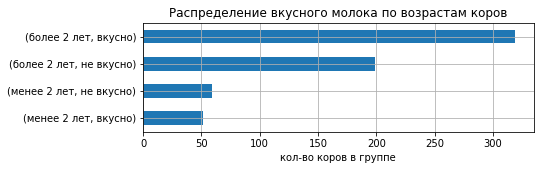

In [68]:
data_ferma.groupby(['возраст','вкус_молока'])['возраст'].count().sort_values(ascending = True).\
plot(kind = 'barh', figsize = (7,2), grid = True, title = 'Распределение вкусного молока по возрастам коров')
plt.xlabel('кол-во коров в группе')
plt.ylabel('')
plt.xticks(rotation = 0)
plt.show()

Видим, что кол-во данных по группам до 2 лет и после 2 лет отличаются в разы

Теперь необходимо подготовить данные для модели логистической регрессии, обучить ее и посмотреть основные метрики. Так как целевой признак изменился на `вкус молока`, то улучшенные данные с убранной неллинейностью из датафрейма с лучшей моделью из прошлого раздела `data_ferma_model_3` нам не нужны, поэтому воспользуемся для первого построения данными из первого основного датафрейма `data_ferma`. Для того, чтобы не было путаницы с `pos_label` при подсчете метрик и построении матрицы, превратим целевой признак `вкус_молока` в бинарный, где 0 - не вкусно, 1 - вкусно. Если это не сделать, то на матрице будут отображаться значения вкусно для 0, а не вкусно для 1. Создадим копию `data_ferma` и назовем ее `data_ferma_log_reg`

In [69]:
data_ferma_log_reg = data_ferma.copy()

#заменим значения не вкусно на 0, а вкусно на 1
for row in data_ferma_log_reg.index:
    if data_ferma_log_reg.loc[row,'вкус_молока'] == 'не вкусно':
        data_ferma_log_reg.loc[row,'вкус_молока'] = 0
    else:
        data_ferma_log_reg.loc[row,'вкус_молока'] = 1

#приведем этот столбец к типу int        
data_ferma_log_reg['вкус_молока'] = data_ferma_log_reg['вкус_молока'].astype('int')
data_ferma_log_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой              628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой_протеин     628 non-null    int64  
 4   спо               628 non-null    float64
 5   порода            628 non-null    object 
 6   тип_пастбища      628 non-null    object 
 7   порода_папы_быка  628 non-null    object 
 8   жирность          628 non-null    float64
 9   белок             628 non-null    float64
 10  вкус_молока       628 non-null    int64  
 11  возраст           628 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 59.0+ KB


Теперь обучим модель и вычислим метрики

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.643312101910828
recall:  0.875
precision:  0.631


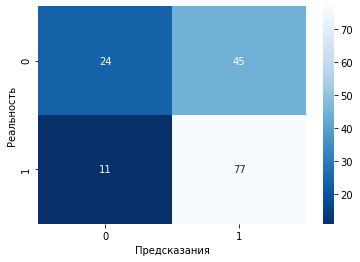

In [70]:
RANDOM_STATE = 42

X = data_ferma_log_reg.drop(['вкус_молока','id','порода','порода_папы_быка'], axis = 1)
y = data_ferma_log_reg['вкус_молока']

num_col_names = ['эке','сырой_протеин','спо','жирность','белок','удой']
cat_col_names= ['возраст','тип_пастбища']

X_train, X_test, y_train, y_test = train_test_split(
     X,y,random_state = RANDOM_STATE
)

encoder = OneHotEncoder(drop='first', sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)# для столбца вкус молока со значением вкусно/не вкусно: , pos_label = 'вкусно')
precision = precision_score(y_test, y_pred)# для столбца вкус молока со значением вкусно/не вкусно: , pos_label = 'вкусно')

cm = confusion_matrix(y_test,y_pred)


print('Метрики для обученной модели логистической регрессии:')
print('accuracy_score:',accuracy)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

plt.ylabel('Реальность')
plt.xlabel('Предсказания')
plt.show()

Посмотрим веса модели

In [71]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")

возраст_менее 2 лет : -0.358535
тип_пастбища_Холмистое: +0.602942
эке                 : +0.473172
сырой_протеин       : +0.118743
спо                 : +0.399446
жирность            : -0.118717
белок               : +0.211463
удой                : -0.510076


Сильных перекосов в показателях весов в сторону одного из признаков нет. Точность модели оставляет желать лучшего. Попробуем добавить или удалить столбцы и посмотреть на изменение модели. Для удобства будем использовать функцию

In [72]:
#используем функцию для разбития на тренировочную и тестовую выборки, а также для масштабирования и кодирования признаков
#Входные аргументы:
#df -  датафрейм для разбития данных 
#main_column - целевой признак
#del_column - столбцы входных признаков, которые не должны принимать участие в обучении модели
#num_col_names - количественные столцы входных признаков для масштабирования
#cat_col_names - категориальные столбцы входных признаков для кодирования

def log_model(df,main_column,del_column,num_col_names,cat_col_names):
    RANDOM_STATE = 42

    X = df.drop(del_column, axis = 1)
    y = df[main_column]

    X_train, X_test, y_train, y_test = train_test_split(
     X,y,random_state = RANDOM_STATE
    )

    encoder = OneHotEncoder(drop='first', sparse_output = False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    encoder_col_names = encoder.get_feature_names_out()

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    clf = LogisticRegression()

    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    cmc = confusion_matrix(y_test,y_pred)


    print('Метрики для обученной модели логистической регрессии:')
    print('accuracy_score:',accuracy)
    print('recall: ',round(recall ,3))
    print('precision: ',round(precision,3))
    sns.heatmap(cmc, annot=True, fmt='d', cmap='Blues_r')

    plt.ylabel('Реальность')
    plt.xlabel('Предсказания')
    plt.show()

Добавим столбцы 'порода', 'порода_папы_быка' в модель

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.643312101910828
recall:  0.898
precision:  0.627


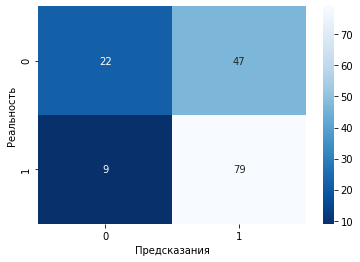

In [73]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id'],
          num_col_names = ['эке','сырой_протеин','спо','жирность','белок','удой'],
          cat_col_names = ['возраст','тип_пастбища','порода','порода_папы_быка']
         )

без особых изменений, уберем породы, теперь уберем `удой` из модели

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6178343949044586
recall:  0.852
precision:  0.615


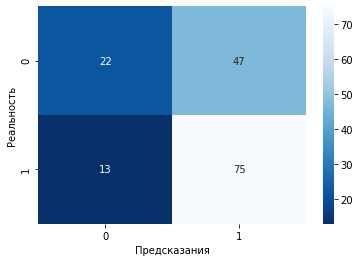

In [74]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','удой'],
          num_col_names = ['эке','сырой_протеин','спо','жирность','белок'],
          cat_col_names = ['возраст','тип_пастбища']
         )

качество снизилось, вернем `удой` и уберем `возраст`

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6242038216560509
recall:  0.852
precision:  0.62


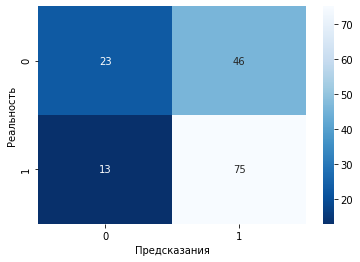

In [75]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','возраст'],
          num_col_names = ['эке','сырой_протеин','спо','жирность','белок','удой'],
          cat_col_names = ['тип_пастбища']
         )

качество снизилось, вернем `возраст` и уберем `тип_пастбища`

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.643312101910828
recall:  0.886
precision:  0.629


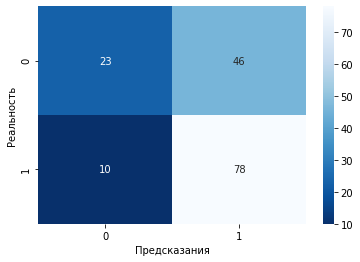

In [76]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища'],
          num_col_names = ['эке','сырой_протеин','спо','жирность','белок','удой'],
          cat_col_names = ['возраст']
         )

точность немного повысилась каждой метрики, не будем использовать в модели тип_пастбища

теперь уберем `эке`

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6114649681528662
recall:  0.898
precision:  0.603


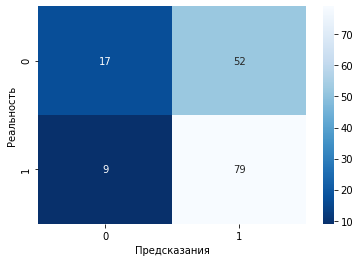

In [77]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища','эке'],
          num_col_names = ['сырой_протеин','спо','жирность','белок','удой'],
          cat_col_names = ['возраст']
         )

ухудшилось качество двух характеристик, вернем `эке` и уберем `спо`

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.643312101910828
recall:  0.875
precision:  0.631


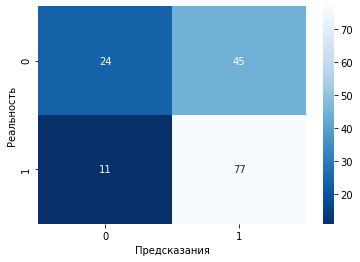

In [78]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища','спо'],
          num_col_names = ['эке','сырой_протеин','жирность','белок','удой'],
          cat_col_names = ['возраст']
         )

качество ухудшилось, вернем `спо` и уберем `сырой_протеин` 

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6305732484076433
recall:  0.875
precision:  0.621


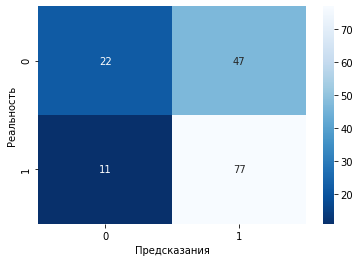

In [79]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища','сырой_протеин'],
          num_col_names = ['эке','спо','жирность','белок','удой'],
          cat_col_names = ['возраст']
         )

качество ухудшилось, вернем `сырой_протеин` и уберем `жирность` 

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.643312101910828
recall:  0.875
precision:  0.631


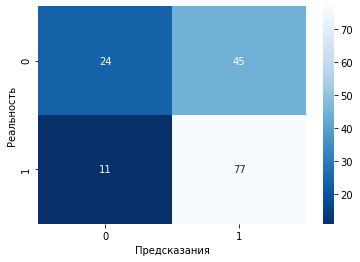

In [80]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища','жирность'],
          num_col_names = ['эке','сырой_протеин','спо','белок','удой'],
          cat_col_names = ['возраст']
         )

качество ухудшилось, вернем `жирность` и уберем `белок` 

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6114649681528662
recall:  0.864
precision:  0.608


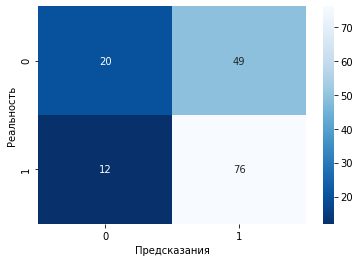

In [81]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища','белок'],
          num_col_names = ['эке','сырой_протеин','спо','жирность','удой'],
          cat_col_names = ['возраст']
         )

Качество вновь ухудшилось

Пока лучшее соотношение столбцов для модели такое:

          `num_col_names = ['эке','сырой_протеин','спо','жирность','белок','удой'],
          cat_col_names = ['возраст']`
         

Нужно попробовать добавить новый входной признак для увеличения точности модели. Из описания данных мы видим, что из данных СПО и сырого протеина мы можем вычислить количество сахара в корме коровы, если перемножим эти величины между собой. Добавим новые данные в датафрейм и проверим заново модель

In [82]:
data_ferma_log_reg['сахар'] = data_ferma_log_reg['спо'] * data_ferma_log_reg['сырой_протеин']
data_ferma_log_reg

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,сахар
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более 2 лет,1551.270
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее 2 лет,1902.820
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,0,более 2 лет,1640.790
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,0,более 2 лет,1780.620
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее 2 лет,1482.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,Рефлешн Соверинг,Равнинное,Айдиал,3.74,3.075,0,более 2 лет,1846.160
624,626,5513,12.9,1700,0.880,Рефлешн Соверинг,Равнинное,Соверин,3.64,3.073,1,менее 2 лет,1496.000
625,627,5970,14.4,1837,0.880,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,0,более 2 лет,1616.560
626,628,5746,13.8,1994,0.890,Рефлешн Соверинг,Равнинное,Соверин,3.64,3.077,1,более 2 лет,1774.660


Посмотрим еще раз матрицу корреляции, чтобы убедиться, что не возникло мультиколлинеарности

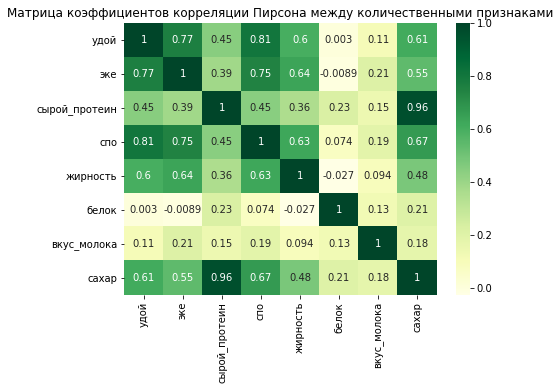

In [84]:
plt.figure(figsize = (7,5))
sns.heatmap(data_ferma_log_reg.loc[:,'удой':].corr(), annot=True, cmap='YlGn')
plt.title('Матрица коэффициентов корреляции Пирсона между количественными признаками')
plt.show()

Входной признак сахар имеет мультиколлинеарность с другим признаком - сырой протеин, корреляция между сахаром и вкусом молока чуть выше

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6496815286624203
recall:  0.886
precision:  0.634


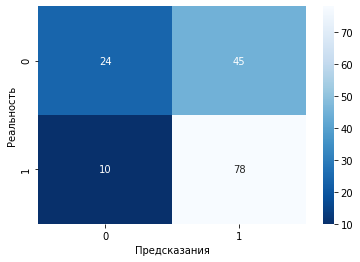

In [85]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища'],
          num_col_names = ['эке','спо','сырой_протеин','жирность','белок','удой','сахар'],
          cat_col_names = ['возраст']
         )

ничего особо не поменялось в сравнении с лучшим на данный момент набором столбцов, удалим мультиколлинеарный признак `сырой_протеин` 

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.643312101910828
recall:  0.886
precision:  0.629


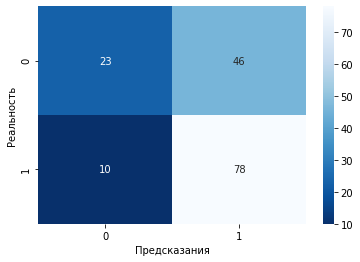

In [86]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища','сырой_протеин'],
          num_col_names = ['эке','спо','жирность','белок','удой','сахар'],
          cat_col_names = ['возраст']
         )

Качество ухудшилось, поэтому оставим признак `сырой_протеин` и удалим признак `сахар`, который не помог увеличить точность модели

Попробуем добавим величину жирность в кг, посчитанную от общей величины удоя за год 

In [87]:
data_ferma_log_reg['жирность_удой'] = (data_ferma_log_reg['удой'] * data_ferma_log_reg['жирность']) /100
data_ferma_log_reg.head(5)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,сахар,жирность_удой
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более 2 лет,1551.270,209.8954
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее 2 лет,1902.820,195.7266
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,0,более 2 лет,1640.790,208.5790
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,0,более 2 лет,1780.620,200.4300
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее 2 лет,1482.375,197.7646


Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6496815286624203
recall:  0.886
precision:  0.634


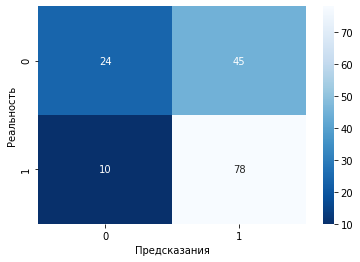

In [88]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища','сахар'],
          num_col_names = ['эке','спо','сырой_протеин','жирность','белок','удой','жирность_удой'],
          cat_col_names = ['возраст']
         )

Изменений нет никаких, уберем `жирность`

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.643312101910828
recall:  0.886
precision:  0.629


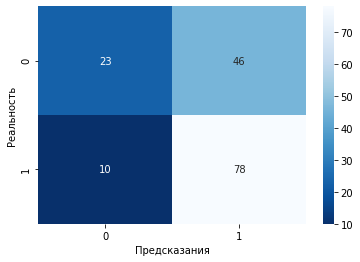

In [89]:
log_model(df = data_ferma_log_reg,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','порода','порода_папы_быка','тип_пастбища','сахар','жирность'],
          num_col_names = ['эке','спо','сырой_протеин','белок','удой','жирность_удой'],
          cat_col_names = ['возраст']
         )

Добавление новой характеристики `жирность_удой` не дало результата, с белком, выраженным в кг от общего количества удоя за год, получился такой же результат. Величины, расчитываемые от тех величин, которые уже есть в таблице , не дают изменений или только ухудшают результат, тут нужна совершенно новая характеристика. Величину точности модели улучшить не получается

Попробуем взять за основу датафрейм `data_ferma_model_3`, в котором СПО был превращен в бинарный признак, а `эке` был в квадрате. Целевой признак `вкус молока` также превратим в бинарный для исключения путаницы при построения матрицы (чтобы вкусно было 1, не вкусно было 0)

Так как в этом датафрейме спо был переведен в бинарный категориальный признак, то переместим его из num_col_names в cat_num_names и в дальнейшем будем его кодировать, а не масштабировать

In [90]:
data_ferma_log_reg_2 = data_ferma_model_3.copy()

#заменим значения не вкусно на 0, а вкусно на 1
for row in data_ferma_log_reg_2.index:
    if data_ferma_log_reg_2.loc[row,'вкус_молока'] == 'не вкусно':
        data_ferma_log_reg_2.loc[row,'вкус_молока'] = 0
    else:
        data_ferma_log_reg_2.loc[row,'вкус_молока'] = 1

#приведем этот столбец к типу int        
data_ferma_log_reg_2['вкус_молока'] = data_ferma_log_reg_2['вкус_молока'].astype('int')
data_ferma_log_reg_2

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,имя_папы
0,1,5863,201.64,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более 2 лет,Буйный
1,2,5529,163.84,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее 2 лет,Соловчик
2,3,5810,196.00,1854,0.0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,0,более 2 лет,Барин
3,4,5895,153.76,2012,0.0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,0,более 2 лет,Буйный
4,5,5302,163.84,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее 2 лет,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,237.16,1964,1.0,Рефлешн Соверинг,Равнинное,Айдиал,3.74,3.075,0,более 2 лет,Буйный
624,626,5513,166.41,1700,0.0,Рефлешн Соверинг,Равнинное,Соверин,3.64,3.073,1,менее 2 лет,Барин
625,627,5970,207.36,1837,0.0,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,0,более 2 лет,Барин
626,628,5746,190.44,1994,0.0,Рефлешн Соверинг,Равнинное,Соверин,3.64,3.077,1,более 2 лет,Барин


Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6560509554140127
recall:  0.875
precision:  0.642


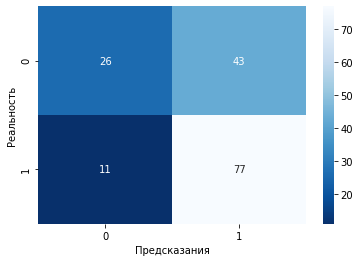

In [91]:
log_model(df = data_ferma_log_reg_2,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','тип_пастбища','порода','порода_папы_быка'],
          num_col_names = ['эке','сырой_протеин','жирность','белок','удой'],
          cat_col_names = ['возраст','спо']
         )

**Благодаря тому, что мы использовали в качестве основы датафрейм для построения третьей - лучшей модели линейной регрессии (где были переведны в бинарный признак `спо` и `эке` был в квадрате), после чего переместили `спо` из количественных столбцов в категориальные, то качество модели улучшилось - accuracy_score увеличился почти на 1%, а precision на 0.6%**


Учитывая это, оставим этот датафрейм как основной для дальнейщего подбора входных признаков. Теперь попробуем добавить `имя_папы` во входные признаки

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6178343949044586
recall:  0.864
precision:  0.613


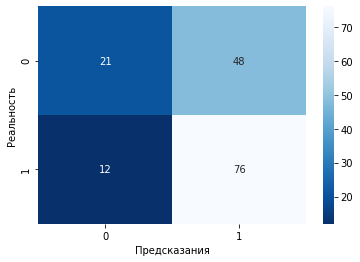

In [92]:
log_model(df = data_ferma_log_reg_2,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','тип_пастбища','порода','порода_папы_быка'],
          num_col_names = ['эке','сырой_протеин','жирность','белок','удой'],
          cat_col_names = ['возраст', 'имя_папы','спо']
         )

Модель ухудщилась, добавим имя породы и имя породы папы

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6242038216560509
recall:  0.864
precision:  0.618


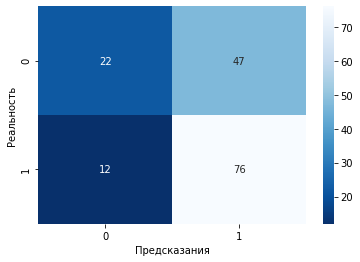

In [93]:
log_model(df = data_ferma_log_reg_2,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id'],
          num_col_names = ['эке','сырой_протеин','жирность','белок','удой'],
          cat_col_names = ['возраст', 'имя_папы','порода','порода_папы_быка','тип_пастбища','спо']
         )

Снова параметры ухудшились, `имя_папы`, `порода` и `порода_папы_быка` делают качество модели только хуже.

**Учитывая все перебранные варианты, остаемся на лучшем наборе столбцов:**

```
log_model(df = data_ferma_log_reg_2,
          main_column = 'вкус_молока',
          del_column = ['вкус_молока','id','тип_пастбища','порода','порода_папы_быка'],
          num_col_names = ['эке','сырой_протеин','жирность','белок','удой'],
          cat_col_names = ['возраст','спо']
         )
```

а за основу с данными оставил датафрейм `data_ferma_log_reg_2`, основанный на датафрейме с данными при построении третьей модели линейной регрессии `data_model_3`, где `спо` был переделан в бинарный признак , а `эке` возведен в квадрат. Использование этого датафрейма и переведение `спо` в категориальные признаки на процент увеличили `accuracy` и на 0.6% увеличи precision, критически важный для нас. 

*Для исключения ошибок построим и обучим итоговую модель еще раз модель перед изменением порога, также можно было добавить return в функцию и все нужные результаты передать в переменные*

Метрики для обученной модели логистической регрессии:
accuracy_score: 0.6560509554140127
recall:  0.875
precision:  0.642


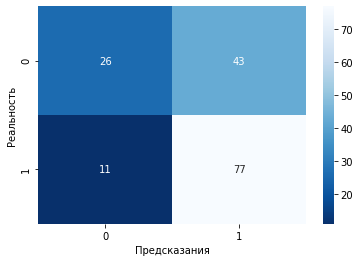

In [94]:
RANDOM_STATE = 42

X = data_ferma_log_reg_2.drop(['вкус_молока','id','тип_пастбища','порода','порода_папы_быка'], axis = 1)
y = data_ferma_log_reg_2['вкус_молока']

num_col_names = ['эке','сырой_протеин','жирность','белок','удой']
cat_col_names= ['возраст','спо']

X_train, X_test, y_train, y_test = train_test_split(
     X,y,random_state = RANDOM_STATE
)

encoder = OneHotEncoder(drop='first', sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)# для столбца вкус молока со значением вкусно/не вкусно: , pos_label = 'вкусно')
precision = precision_score(y_test, y_pred)# для столбца вкус молока со значением вкусно/не вкусно: , pos_label = 'вкусно')

cm = confusion_matrix(y_test,y_pred)


print('Метрики для обученной модели логистической регрессии:')
print('accuracy_score:',accuracy)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

plt.ylabel('Реальность')
plt.xlabel('Предсказания')
plt.show()

In [95]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")


возраст_менее 2 лет : -0.318047
спо_1.0             : -0.569512
эке                 : +0.656973
сырой_протеин       : +0.153818
жирность            : -0.067201
белок               : +0.286836
удой                : -0.100849


По полученным показателям видно, что больший вес имеют признаки `эке` и `спо`. Особых перекосов в сторону веса одного из признаков не наблюдается

**При построении модели логистической регрессии были получены следующие результаты:**
- при обучении модели использование столбцов `имя_папы`, `порода`, `порода_папы_быка`, `тип пастбища` ухудшало качество модели, метрики ухудшались
- новые признаки, выведенные из существующих данных: содержание сахара в корме, удой в день,  удой помноженный на  жирность, практически не влияют на качество модели
- использование датафрейма с данными при построении третьей модели линейной регрессии, где `спо` был переделан в бинарный признак и переведен в число категориальных столбцов, а `эке` возведен в квадрат, на процент увеличили `accuracy` и на 0.6% увеличило precision, критически важный для нас, поэтому в дальнейшем использовались именно эти данные в качестве основных при построении модели 

*Список столбцов, при использовании которых метрики модели получились самые точные, получился следующим:*

- количественные столбцы: 'эке','сырой_протеин','жирность','белок','удой' (`эке` в квадрате)
- категориальные столбцы: 'возраст','спо' (`спо` переделан в бинарный признак)

*Итоговые метрики модели до изменения порога классификации:*

- accuracy_score: 0.6560509554140127
- recall:  0.875
- precision:  0.642

### Изменение порога модели

В нашем случае критичной является ошибка 1 рода, важнее всего для модели умение определять выбор вкусного молока (0-не вкусно, 1-вкусно), поэтому основная метрика для нас precision, у нас должно быть меньше ложно положительных ответов, ничего страшного если модель определит вкусное молоко, как  не вкусное, самое главно чтобы набор вкусного молока соответсвовал реальности. Для того, чтобы наша модель могла точно определять, что молоко вкусное, нам необходимо изменить порог классификации, чтобы было меньше ошибок FP, чтобы мы точно могли знать, что модель отнесла молоко к классу вкусно (1) без ошибок, так как это основной критерий фермера. Для этого нам нужно повысить precision

Для изменения порога нам сначала нужно сделать таблицу с реальными значениями и с метками предсказанных значений модели, выведем объекты по убыванию вероятности принадлежности их к классу 1

In [96]:
y_proba_test_log = clf.predict_proba(X_test)[:,1]
pred_log  = pd.DataFrame(zip(y_test,y_proba_test_log),
                             columns = ['y_real', 'y_proba']).sort_values(by='y_proba',ascending=False)
pred_log.head(10)

,y_real,y_proba
8,1,0.851249
108,0,0.838458
15,1,0.820187
85,1,0.809319
66,1,0.805594
146,1,0.804803
80,0,0.793351
51,1,0.789243
19,1,0.788988
110,1,0.784811


Следующим шагом сделаем интервал порогов и выведем для каждого порога его прогнозное значение, так как у нас нет вероятности больше 85.2%, то конечный диапазон порога зададим в 0.9, все равно ни одно значение не попадает выше границы 0.85 порога

Зададим наш диапазон порогов от 0.2 до 0.9 с разбивкой на 40 интервалов

In [98]:
thresholds = [round(i,2) for i in np.linspace(0.2,0.9, num = 40, endpoint = False)]

Создадим наглядную таблицу для всех прогнозов в зависимости от значений порога

In [99]:
for i in thresholds:
    pred_log['y_pred_'+str(i)] = pred_log['y_proba'].apply(lambda elem: 1 if elem >= i else 0)

pred_log

,y_real,y_proba,y_pred_0.2,y_pred_0.22,y_pred_0.24,y_pred_0.25,y_pred_0.27,y_pred_0.29,y_pred_0.3,y_pred_0.32,...,y_pred_0.72,y_pred_0.74,y_pred_0.76,y_pred_0.78,y_pred_0.8,y_pred_0.81,y_pred_0.83,y_pred_0.85,y_pred_0.86,y_pred_0.88
8,1,0.851249,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
108,0,0.838458,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
15,1,0.820187,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
85,1,0.809319,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
66,1,0.805594,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0.348843,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
23,1,0.335103,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
144,0,0.325656,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
81,1,0.283537,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь составим наглядную таблицу со всеми значениями precision и recall для всех порогов, также добавим кол-ва False Positive и False Negative, чтобы было видно наглядно все значения ошибок и мы могли определить порог, при котором кол-во нужной нам критической ошибки FP становится 0, а значение метрики precision становится 1.

In [100]:
columns = []
values_acc = []
values_pr = []
values_re = []
values_true = []
values_false = []
values_fp = []
values_fn = []

for i in pred_log.columns[2:]:
    columns.append(i)
    values_acc.append(accuracy_score(pred_log['y_real'], pred_log[i]))
    values_pr.append(precision_score(pred_log['y_real'], pred_log[i]))
    values_re.append(recall_score(pred_log['y_real'], pred_log[i]))
    values_true.append((pred_log['y_real'] == pred_log[i]).sum())
    values_false.append((pred_log['y_real'] != pred_log[i]).sum())
    values_fp.append(pred_log.loc[pred_log['y_real'] == 0, i].apply(lambda row: 1 if row == 1 else 0).sum())
    values_fn.append(pred_log.loc[pred_log['y_real'] == 1, i].apply(lambda row: 1 if row == 0 else 0).sum())

recall_precision_FP_FN_values = pd.DataFrame(zip(columns, values_true, values_false, values_acc, values_pr, values_re,values_fp,values_fn),\
columns = ['Порог', 'Кол-во правильных предсказаний','Кол-во неправильных предсказаний','Accuracy','Precision', 'Recall','Кол-во ошибок False Positive','Кол-во ошибок False Negative'])
recall_precision_FP_FN_values

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Порог,Кол-во правильных предсказаний,Кол-во неправильных предсказаний,Accuracy,Precision,Recall,Кол-во ошибок False Positive,Кол-во ошибок False Negative
0,y_pred_0.2,88,69,0.560510,0.560510,1.000000,69,0
1,y_pred_0.22,88,69,0.560510,0.560510,1.000000,69,0
2,y_pred_0.24,88,69,0.560510,0.560510,1.000000,69,0
3,y_pred_0.25,88,69,0.560510,0.560510,1.000000,69,0
4,y_pred_0.27,89,68,0.566879,0.564103,1.000000,68,0
5,y_pred_0.29,88,69,0.560510,0.561290,0.988636,68,1
6,y_pred_0.3,88,69,0.560510,0.561290,0.988636,68,1
7,y_pred_0.32,88,69,0.560510,0.561290,0.988636,68,1
8,y_pred_0.34,88,69,0.560510,0.562092,0.977273,67,2
9,y_pred_0.36,89,68,0.566879,0.565789,0.977273,66,2


**Из таблицы видно, чтобы достичь значения критической ошибки FP равное 0, а значение метрики Precision поднять до 1, нам нужно взять значение порога классификации 0.85, при это остальные метрики, конечно, стали ощутимо меньше, accuracy = 0.445860, а recall = 0.011364**

*Для улучшения качества модели необходимо узнать о каких-то дополнительных признаках, так как с таким высоким значением порога классификации для исключения критических ошибок маловероятно будет подобрано хоть какое-то кол-во коров для покупки, так как большая часть отсеится, если не все. Дальше при получении прогнозов на покупных коровах посмотрим, при таком высоком пороге классификации, будут ли рекомендованы к покупке какие-то коровы.*

### Прогнозирование вкуса молока покупных коров 

Для прогнозирования вкуса молока возьмем уже подготовленную таблицу `data_cow_buy_pred`, которую получили при прогнозировании лучшей модели линейной регрессии

In [101]:
data_cow_buy_pred.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,спо,сырой_протеин
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,233.361138,1.0,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,233.361138,1.0,2019.947532
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,233.361138,1.0,2019.947532
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,233.361138,1.0,2019.947532
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,233.361138,1.0,2019.947532


Добавим столбец с прогнозными значениями удоя, полученными от лучшей модели линейной регрессии, так как кол-во и порядок столбцов при тестировании должен быть таким же, как и при обучении модели.

In [102]:
data_cow_buy_pred['прогнозный_удой'] = predictions_milk
data_cow_buy_pred['прогнозный_удой'] = round(data_cow_buy_pred['прогнозный_удой'],2)
data_cow_buy_pred.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,спо,сырой_протеин,прогнозный_удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,233.361138,1.0,2019.947532,6609.92
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,233.361138,1.0,2019.947532,6378.71
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,233.361138,1.0,2019.947532,6284.00
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,233.361138,1.0,2019.947532,6593.09
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,233.361138,1.0,2019.947532,6542.15


Для того, чтобы получить прогнозные значения логистической модели, ей необходимо передать столбцы в той же последовательности и с теми же названиями столбцов, что были на тренировочной выборке, поэтому переименуем столбцы `текущая жирность`, `текущий_уровень_белок` и `прогнозный_удой` в `жирность`,`белок` и `удой`

In [103]:
data_cow_buy_pred = data_cow_buy_pred.rename(columns = \
                                   {'текущая_жирность':'жирность','текущий_уровень_белок':'белок','прогнозный_удой':'удой'})

Проверяем замену

In [104]:
data_cow_buy_pred.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,спо,сырой_протеин,удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,233.361138,1.0,2019.947532,6609.92
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,233.361138,1.0,2019.947532,6378.71
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,233.361138,1.0,2019.947532,6284.00
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,233.361138,1.0,2019.947532,6593.09
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,233.361138,1.0,2019.947532,6542.15


Получаем прогнозные значения вкуса молока для датафрейма `data_cow_buy_pred`, используя обученный `encoder` и `scaler` на логистической модели `clf`

In [105]:
num_col_names = ['эке','сырой_протеин','жирность','белок','удой']  
cat_col_names = ['возраст','спо']

cow_buy_ohe = encoder.transform(data_cow_buy_pred[cat_col_names])
cow_buy_scaled = scaler.transform(data_cow_buy_pred[num_col_names])

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

cow_buy = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

predictions_taste = clf.predict(cow_buy)

Выведем полученный массив прогнозных значений

In [106]:
predictions_taste

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

Посмотрим на полученные метки принадлежности классу 1 - вкусно

In [107]:
y_proba_prediction_taste = clf.predict_proba(cow_buy)[:,1]
y_proba_prediction_taste

array([0.6527931 , 0.71755742, 0.61620146, 0.27759392, 0.59853762,
       0.09798071, 0.6527931 , 0.72636335, 0.61620146, 0.68189999,
       0.15400662, 0.5587927 , 0.06082104, 0.59090214, 0.61620146,
       0.37456227, 0.72289955, 0.09309407, 0.48996087, 0.59853762])

*Полученные метки вероятности не превышают  72%, только для 3 коров этот порог превысил 70%. Поэтому имея целый 9 прогнозный коров со вкусным молоком нельзя быть точно уверенным в правильности такого прогноза из-за наивысшего показателя y_proba в 72.6%*

**На этапе построения модели логистической регрессии были сделаны следующие действия и получены следующие выводы:**
- был подобран набор столбцов с входными признаками, при использовании которых метрики модели получились самые точные:
  - количественные столбцы: 'эке','сырой_протеин','жирность','белок','удой' (`эке` в квадрате)
  - категориальные столбцы: 'возраст','спо' (`спо` переделан в бинарный признак)
- при обучении модели использование столбцов `имя_папы`, `порода`, `порода_папы_быка`, `тип пастбища` ухудшало качество модели, метрики ухудшались
- для улучшения точности модели были введены новые входные признаки: содержание сахара в корме, удой в день,  удой помноженный на  жирность, все эти новые признками, выведенные из существующих данных, практически не влияют на качество модели
- использование датафрейма с данными при построении третьей модели линейной регрессии, где `спо` был переделан в бинарный признак и переведен в число категориальных столбцов, а `эке` возведен в квадрат, на процент увеличили `accuracy` и на 0.6% увеличило precision, критически важный для нас, поэтому в дальнейшем использовались именно эти данные в качестве основных при построении модели 

*Итоговые метрики модели до изменения порога классификации:*

- accuracy_score: 0.6560509554140127
- recall:  0.875
- precision:  0.642

  
- с итоговым набором столбцов была обучена модель логистической регрессии, для улучшения точности модели отнесения к определенному классу было принятно решение изменить порог принадлежности к классу. Учитывая тот факт, что для фермера критичным критерием является вкус молока, то модель должна делать минимальное кол-во ошибок именно к принадлежности к классу молока `вкусно` (1). Пускай модель неправильно отнесет вкусное молоко к невкусному, но зато все молоко, определенное в класс вкусное, действительно будет таким являться.. Была получена общая таблица с указанием критически важной ошибки первого рода (FP) в зависимости от разных порогов классификации:
    - из данных таблицы можно сделать вывод, чтобы достичь значения критической ошибки FP равному 0, а значение метрики Precision поднять до 1, нам нужно взять значение порога классификации 0.85, при это остальные метрики, конечно, становятся ощутимо меньше.
    - после получения прогнозного значения вкуса молока для покупных коров стало очевидно, что при таком пороге классификации (0.85) на обучаемом датасете еще были отобраны коровы со вкусным молоком, но вот на датасете с покупными коровами применение такого высокого порога не дает ни одной коровы с точным отнесением к классу вкусно. Максимально возможный порог для использования может быть равен 0.71, при котором молоко 3 коров будет спрогнозировано как вкусное, а общее кол-во ошибок отнесения к классу (FP) из всего набора тестовой выборки (157 строк) тренировочного датасета составляет 5,7%, что является достаточно низким процентом ошибки.

*Для улучшения качества модели необходимо узнать о каких-то дополнительных признаках, которые не будут выводиться из существующих, так как вывод новых признаков из существующих никак не улучшил качество модели, нужны именно новые признаки.*

## Итоговые выводы

### Составление итоговой прогнозной таблицы

Теперь необходимо собрать все данные в итоговую таблицу и подвести итог исследования

Так как итоговая таблица будет представляться заказчику, то для наглядности мы будем использовать самый начальный датафрейм `data_cow_buy`, где `эке` и `спо` представлены первоначальными значениями.

In [108]:
data_cow_buy.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


Добавим в итоговую таблицу следующую информацию:
- прогнозные значения удоя,
- нижнюю границу доверительного интервала
- верхнюю границу доверительного интервала
- прогнозные значения вкуса молока при стандартном пороге классификации 0.5
- значения самих предсказанных вероятностей для класса вкусного молока для наглядности
- прогнозные значения вкуса молока при пороге классификации 0.85, где величина ошибки составляет 0%
- прогнозные значения вкуса молока при пороге классификации 0.72, где величина ошибки состалвляет 5.7%

In [109]:
data_cow_buy['прогнозный_удой'] = predictions_milk
data_cow_buy['прогнозный_удой'] = round(data_cow_buy['прогнозный_удой'],2)

data_cow_buy['низ_довер_интервала'] = data_cow_buy['прогнозный_удой'] - (conf_interval/2)
data_cow_buy['верх_довер_интервала'] = data_cow_buy['прогнозный_удой'] + (conf_interval/2)

data_cow_buy['порог_0_5'] = predictions_taste
#изменение значений 1 и 0 для вкуса молока на вкусно и не вкусно
data_cow_buy['порог_0_5'] = data_cow_buy['порог_0_5'].apply(lambda elem: 'вкусно' if elem == 1 else 'не вкусно')

data_cow_buy['вероятность_вкусного_молока'] = y_proba_prediction_taste
data_cow_buy['вероятность_вкусного_молока'] = round(data_cow_buy['вероятность_вкусного_молока'],2)

data_cow_buy['порог_0_72'] = data_cow_buy['вероятность_вкусного_молока'].apply(lambda elem: 'вкусно' if elem >= 0.72 else 'не вкусно')
data_cow_buy['порог_0_85'] = data_cow_buy['вероятность_вкусного_молока'].apply(lambda elem: 'вкусно' if elem >= 0.85 else 'не вкусно')

Выведем итоговую таблицу

In [110]:
data_cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,прогнозный_удой,низ_довер_интервала,верх_довер_интервала,порог_0_5,вероятность_вкусного_молока,порог_0_72,порог_0_85
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.92,6235.40,6984.44,вкусно,0.65,не вкусно,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,6378.71,6004.19,6753.23,вкусно,0.72,вкусно,не вкусно
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6284.00,5909.48,6658.52,вкусно,0.62,не вкусно,не вкусно
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,6593.09,6218.57,6967.61,не вкусно,0.28,не вкусно,не вкусно
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,6542.15,6167.63,6916.67,вкусно,0.60,не вкусно,не вкусно
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,6425.38,6050.86,6799.90,не вкусно,0.10,не вкусно,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.92,6235.40,6984.44,вкусно,0.65,не вкусно,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6571.26,6196.74,6945.78,вкусно,0.73,вкусно,не вкусно
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6284.00,5909.48,6658.52,вкусно,0.62,не вкусно,не вкусно
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,6400.54,6026.02,6775.06,вкусно,0.68,не вкусно,не вкусно


Оставим в таблице только покупных коров, прогнозы которох подходят под наши два критерия:
- удой больше 6000 кг
- молоко вкусное

In [111]:
data_cow_buy.query('низ_довер_интервала > 6000 and порог_0_5 == "вкусно"')

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,прогнозный_удой,низ_довер_интервала,верх_довер_интервала,порог_0_5,вероятность_вкусного_молока,порог_0_72,порог_0_85
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.92,6235.40,6984.44,вкусно,0.65,не вкусно,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,6378.71,6004.19,6753.23,вкусно,0.72,вкусно,не вкусно
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,6542.15,6167.63,6916.67,вкусно,0.60,не вкусно,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6609.92,6235.40,6984.44,вкусно,0.65,не вкусно,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6571.26,6196.74,6945.78,вкусно,0.73,вкусно,не вкусно
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,6400.54,6026.02,6775.06,вкусно,0.68,не вкусно,не вкусно
11,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более 2 лет,6617.93,6243.41,6992.45,вкусно,0.56,не вкусно,не вкусно
19,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,6542.15,6167.63,6916.67,вкусно,0.60,не вкусно,не вкусно


Под такие критерии подходят 6 коров. Но если мы хотим минимизировать риски при покупке, то посмотрим на получившихся коров, если использовать порог принадлежности к классу не стандартный 0.5, а 0.72, при котором кол-во ошибок составляет 5.7% от общего числа прогнозов. Для этого выведем коров, которых можно рекомендовать к покупке с минимальным риском: у которых нижняя граница доверительного интервала находится в районе 6000 кг и у которых прогнозное вкусное молоко при пороге классификации 0.72. Так как имен у коров нет, а из первоначальной таблице мы убирали дубликаты с одинаковыми коровами и меняли индексацию, то указание конкретной строки может быть некорректно воспринято менеджерами фирмы продавца, поэтому мы выведем именно строчки с конкретными характеристиками коров, которые можно в дальнейшем передать менеджерам фирмы, у которых мы этих коров покупаем.

*Выведем 2 коров, которых можно рекомендовать к покупке*

In [112]:
data_cow_buy.query('низ_довер_интервала > 6000 and порог_0_72 == "вкусно"')

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,прогнозный_удой,низ_довер_интервала,верх_довер_интервала,порог_0_5,вероятность_вкусного_молока,порог_0_72,порог_0_85
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,6378.71,6004.19,6753.23,вкусно,0.72,вкусно,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6571.26,6196.74,6945.78,вкусно,0.73,вкусно,не вкусно


Можно рекомендовать к покупке с минимальными рисками этих двух коров, у них нижняя граница прогнозного удоя с учетом доверительного интервала составляет больше 6000кг, а вкус молока спрогнозирован вкусным при возможной ошибке модели в 5.7%. Если нужна всего 1 корова, то тогда точно нужно брать корову характеристиками из нижней строки, так как у нее нижняя граница прогнозного удоя с учетом доверительного интервала ошибок почти 6200 кг.

Есть еще корова, у которой нижняя граница прогнозного удоя немного меньше - 5970, в зависимости от того, какое кол-во коров нужно для покупки фермеру, если ему нужно больше 2 коров, то эту корову тоже можно рекомендовать, так как главный критерий вкус молока, а доверительный интервал все-таки очень широкий  и даже с учетом нижней границы прогнозный удой чуть меньше 6000 кг

*Выведем третью корову, которая немного хуже по показателю удоя, но также возможна к покупке по основному критерию - вкусу молока*

In [113]:
data_cow_buy.query('6000> низ_довер_интервала > 5970 and порог_0_72 == "вкусно"')

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,прогнозный_удой,низ_довер_интервала,верх_довер_интервала,порог_0_5,вероятность_вкусного_молока,порог_0_72,порог_0_85
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более 2 лет,6344.71,5970.19,6719.23,вкусно,0.72,вкусно,не вкусно


В результате получены 3 коровы, рекомендованные к покупке при пороге определения класса вкусно 0.72, располагаю их от лучшей рекомендации к худшей:

In [114]:
data_cow_buy.query('низ_довер_интервала > 5970 and порог_0_72 == "вкусно"').sort_values(by='низ_довер_интервала', ascending = False)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,прогнозный_удой,низ_довер_интервала,верх_довер_интервала,порог_0_5,вероятность_вкусного_молока,порог_0_72,порог_0_85
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6571.26,6196.74,6945.78,вкусно,0.73,вкусно,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,6378.71,6004.19,6753.23,вкусно,0.72,вкусно,не вкусно
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более 2 лет,6344.71,5970.19,6719.23,вкусно,0.72,вкусно,не вкусно


**После составления итоговой прогнозной таблицы были получены следующие результаты:**
- при стандартном пороге классификации (0.5, возможная ошибка в этом случае составляет 27.3%) было получено 6 коров, подходящих под необходимые критерии, которые можно рекомендовать к покупке, если у «ЭкоФерма» есть несколько коров с абсолютно идентичными характеристиками, то кол-во коров может увеличится.
- при повышенном пороге классификации (0.72) отнесения молока к вкусному (возможная ошибка в этом случае составляет 5.7%), в рекомендации остается 3 коровы, у одной удой в районе 6200 кг и у двух других чуть выше и чуть ниже 6000 кг.
- из-за неточности модели нет возможности сделать прогноз вкусного молока при повышенном пороге классификации (0.85, возможная ошибка стремится к 0%), так как модель не определила ни у одной покупной коровы такую высокую вероятность отнесения к классу вкусного молока.

### Представление итоговых выводов

**В результате проведенного исследования были проделаны следующие этапы и получены следующие результаты**

**На этапе предобработки данных были выполнены следующие действия:**
- столбцы приведены к "змеиному" регистру и убраны длинные наименования
- датафреймы проверены на явные пропуски
- удалена строка с аномальным значением в столбце `удой`
- исправлены разделители с `,` на `.` в столбцах с численными значениями.
- добавлены пробелы в качестве разделителей между словами в столбцах `порода`
- заменены `_` на пробелы в качестве разделителей между словами в столбце `возраст`
- изменены типы данных в столбцах `эке`,`спо`,`жирность`,`белок`,`текущая_жирность`,`текущий_уровень_белок` на `float`
- удалены явные дубликаты в датафреймах `data_ferma`, `data_cow_buy`
- удалены неявные дубликаты в столбцах `тип_пастбища`,`порода_папы_быка`


**На этапе исследовательского анализа были получены следующие результаты:**

- Минимальная жирность молока покупных коров выше на 0,35%, чем фермерских, это может быть связано с тем, что у покупных коров эти данные указаны на момент кормления. Медианные значения жирности немного выше у покупных коров, а процент белка на на одном уровне. Среднее значение удоя коров на ферме находится в диапазоне 6130 кг

*Полученные графики показали:*
- жирность молока коров на ферме из всего диапазона от 3% до 3.7% больше всего встречается в диапазоне 3.6-3.7% , поэтому видимо были отобраны покупные коровы, имеющие процент жирности не ниже 3.3%
- параметр процента белка показывает нормальное распределение
- самые часто встречаемые показатели сахаро-протеинового соотношение - 0,93 и 0,94
- пиковые значения удоя находятся по бокам от среднего значения - 5600 кг и 6550 кг при среднем значении в области 6130 кг. График без наглядных выбросов.
- график ЭКЕ показывает нормальное распределение с выборосом в области 1.1
- график сырого протеина в корме показывает, что с увеличением кол-ва белка в корме уменьшается частота встречаемости такого корма.
- гистограммы белок, удой и эке похожи на графики нормального распределения
- сильные выбросы на графиках не присутствует

*Полученные диаграммы показывают:*

- фермерские коровы по мнению фермера дают вкусное молоко в 58.9%
- на ферме коров породы Вис Бик Айдиал на 20 % больше от общего кол-ва, чем коров породы Рефлешн Соверинг. Покупные коровы наоборот имеют 55% от общего кол-ва коров породы Рефлешн Соверинг, а 45% Вис Бик Айдиал.
- фермерские коровы пасутся немного больше на холмистых пастбищах, чем на холмистых (55.7% против 44.3%). Покупные коровы наоборот больше пасутся на равнине, чем на холмистых лугах (55% против 45%) 
- коровы на ферме имеют практически равно распределение по породам папы быка: Айдиал и Соверин по половине коров. У покупных коров преобладает порода папы быка Соверин - 60%
- возраст больше 2 лет преобладает и у коров на ферме (82.5 от общего кол-ва) и у покупных коров (75%)
 - по именам папы распределение получилось следующим:
 
    *коровы на ферме:*

    - Барин - 38.2%;
    - Буйный 34.2 %;
    - Соловчик 17.5%;
    - Геркулес 10.2%

    *покупные коровы:*

    - Буйный - 40 %
    - Геркулес 30 %
    - Барин 20 %
    - Соловчик 10 %

Были замечены некоторые особенности:
- у признака `эке` мало значений, меньших 11.5
- у признака `жирность` мало значений меньше 3.1%



**На этапе корреляционного анализа были проведены следующие действия и получены результаты:**

*Полученные матрицы корреляции всех признаков позволяют сделать следующие выводы*

*Между целевым признаком удой и количественными входными признаками наблюдается линнейный тип зависимости, с разными характеристиками связи:*

- тесной между удоем и ЭКЕ, удоем и СПО
- заметной между удоем и жирностью
- умеренной между удоем и концентрацией сырого протеина в корме, удоем и породой папы быка
- слабой между удоем и породой, удоем и типом пастбища, удоем и вкусом молока
- нелинейная слабая связь наблюдается между удоем и белком, их коэффициент корреляции практически равен 0
- между целевым признаком удой и входным признаком возраст наблюдается очень сильная связь, показатель корреляции 1
- между входными признаками не наблюдается мультиколлинеарности*

*Построенные графики диаграмм рессеяния между прогнозным признаком удой и входными признаками подчеркнули несколько особенностей:*
- удой больше 5600 кг дают только коровы возрастом более 2 лет
- при СПО больше 0.92 коровы дают самые высокие показатели удоя более 6000 кг, при СПО 0.95 показатели удоя доходят пиковых значений удоя в 7250 кг
- СПО выше 0.92 дают только коровам с возрастом больше 2 лет
- при СПО с показателем 0.93 в большинстве получается невкусное молоко, при СПО 0.93 и 0.94 молоко в большинстве случаев получается вкусным, из СПО менее 0.9 самым вкусным является молоко с показателем СПО 0.89
- коровы больше всего дают  молоко с самым высоким показателем жирности, 3.6% и 3.7%
- больше всего зависимость между целевым признаком удой проявляется к признаку ЭКЕ и СПО
- у коров породы Вис Бик Айдиал содержание белка в молоке выше, чем у Рефлешн Соверинг
- содержание сырового протеина в корме выше у коров,, пасущихся на холмистых пастбищах
- удой выше 6900 кг дают только коровы, пасущиеся на холмистых пастбищах
- у коров с породов папы быка Айдиал намного выше удой при одинаковых показателях ЭКЕ, сырого протеина в корме и СПО, только при СПО 0.89 удой выше у коров с породой папы быка Соверин

**На этапе построения моделей линейной регрессии были сделаны следующие действия:**
- было построено 3 модели линейной регресии:
- первая модель основывалась на предобработанных данных основного датафрейма `data_ferma`, разные комбинации столбцов в качестве входных признаков особой прогрессии в улучшении модели не дали
- при построении второй модели были убраны неллинейности между целевым признаком `удой` и входным признаком `спо` и между целевым признаком `удой` и входным признаком `эке`.
- при построении третьей модели в качестве входного признака был добавлен признак `имя_папы`.
    
*Полученные модели линейной регрессии имели следующие различия и значения:*
- показатель R2 увеличивался от модели к модели: 78.4%, 81.8% и у третьей модели самый лучший показатель - 82.5%.
- гистограмма распределения остатков у первой модели имела смещение слева от нуля, что говорило о более завышенных предсказаниях модели, у третьей модели такого недостатка нет, также по сранению с графиком второй модели самые часто встречающиеся значения еще больше стали стремиться к 0
- разброс остатков у третьей и второй модели стал более постоянен на небольшую величину, но есть значение в остатке при -600, которое не повторяется больше нигде на всем протяжении
- по расчетам метрик видно, что третья модель точнее остальных рассчитывает прогнозное значение целевого признака, каждая метрика показывает, что третья модель в среднем ошибается на меньшее значение.
- полученные прогнозные значения удоя для покупных коров у всех получились больше 6000 кг. 
- полученные метрики 3 лучшей модели составили следующие значения:
    - R2 = 0.825
    - MSE = 35673.88988618191
    - RMSE = 188.8753289505591
    - MAE =  146.1630244536231 
- стобцы для построения третьей модели, при которых получились лучшие метрики, оказались следующими:
     - столбцы с количественными признаками -  'эке','сырой_протеин'
     - столбцы с категориальными признаками - 'порода','тип_пастбища','порода_папы_быка','возраст','имя_папы','спо'

*Были рассчитаны два доверительных интервала:*

- доверительный интервал в 749.05 кг, в который попадает 95% всех ошибок модели.
- доверительный интервал от -44.74 кг до 14.34 кг, в который с вероятностью 95% попадет среднее значение ошибки в -15 кг


**На этапе построения модели логистической регрессии были сделаны следующие действия и получены следующие выводы:**
- был подобран набор столбцов с входными признаками, при использовании которых метрики модели получились самые точные:
- количественные столбцы: 'эке','сырой_протеин','жирность','белок','удой' (`эке` в квадрате)
- категориальные столбцы: 'возраст','спо' (`спо` переделан в бинарный признак)
- при обучении модели использование столбцов `имя_папы`, `порода`, `порода_папы_быка`, `тип пастбища` ухудшало качество модели, метрики ухудшались
- для улучшения точности модели были введены новые входные признаки: содержание сахара в корме, удой в день,  удой помноженный на  жирность, все эти новые признками, выведенные из существующих данных, практически не влияют на качество модели
- использование датафрейма с данными при построении третьей модели линейной регрессии, где `спо` был переделан в бинарный признак и переведен в число категориальных столбцов, а `эке` возведен в квадрат, на процент увеличили `accuracy` и на 0.6% увеличило precision, критически важный для нас, поэтому в дальнейшем использовались именно эти данные в качестве основных при построении модели 

*Итоговые метрики модели до изменения порога классификации:*

- accuracy_score: 0.6560509554140127
- recall:  0.875
- precision:  0.642

  
- с итоговым набором столбцов была обучена модель логистической регрессии, для улучшения точности модели отнесения к определенному классу было принятно решение изменить порог принадлежности к классу. Учитывая тот факт, что для фермера критичным критерием является вкус молока, то модель должна делать минимальное кол-во ошибок именно в принадлежности к классу молока `вкусно`. Пускай модель неправильно отнесет вкусное молоко к невкусному, но зато все молоко, определенное в класс вкусное, действительно будет таковым. Была получена общая таблица с указанием критически важной ошибки первого рода (FP) в зависимости от разных порогов классификации:
    - из данных таблицы можно сделать вывод, чтобы достичь значения критической ошибки FP равному 0, а значение метрики Precision поднять до 1, нам нужно взять значение порога классификации 0.85, при это остальные метрики, конечно, становятся ощутимо меньше.
    - после получения прогнозного значения вкуса молока для покупных коров стало очевидно, что при таком пороге классификации (0.85) на обучаемом датасете еще были отобраны коровы со вкусным молоком, но вот на датасете с покупными коровами применение такого высокого порога не дает ни одной коровы с точным отнесением к классу вкусно. Максимально возможный порог для использования может быть равен 0.71, при котором молоко 3 коров будет спрогнозировано как вкусное, а общее кол-во ошибок отнесения к классу (FP) из всего набора тестовой выборки (157 строк) тренировочного датасета составляет 5,7%, что является достаточно низким процентом ошибки.

**После составления итоговой прогнозной таблицы были получены следующие результаты:**
- при стандартном пороге классификации (0.5, возможная ошибка в этом случае составляет 27.3%) было получено 6 коров, подходящих под необходимые критерии, которые можно рекомендовать к покупке, если есть несколько коров с абсолютно идентичными характеристиками, то кол-во коров может увеличится.
- при повышенном пороге классификации (0.72) отнесения молока к вкусному (возможная ошибка в этом случае составляет 5.7%), в рекомендации остается 3 коровы, у одной удой в районе 6200 кг и у дву других чуть выше и чуть ниже 6000 кг.
- из-за неточности модели нет возможности сделать прогноз вкусного молока при повышенном пороге классификации (0.85, возможная ошибка первого рода стремится к 0%), так как модель не определила ни у одной покупной коровы такую высокую вероятность отнесения к классу вкусного молока.